# Survey results

## Introduction
Here we will analyze and visualize the survey data.

## Initial setup
Install and load the needed libraries and the survey data.

In [265]:
# List of packages to install
packages <- c("tidyverse", "syuzhet", "wordcloud", "tidytext", "readxl", "tm")

# Function to check and install packages if not already installed
install_if_missing <- function(p) {
  if (!requireNamespace(p, quietly = TRUE)) {
    install.packages(p)
  }
}

# Install necessary packages
invisible(sapply(packages, install_if_missing))

# Load necessary libraries
library(tidyverse) # for data manipulation
library(syuzhet) # for sentiment analysis
library(wordcloud) # for word clouds
library(tidytext) # for text mining
library(readxl) # for reading excel files
library(tm) # for text mining

# Load the provided survey data
file_path <- "data/cleanSurveyData20240514.xlsx"

# this line can be repeated later to reset the data
data <- read_excel(file_path)

# Suppress warnings (this is fine)
options(warn = -1)

### Show the column names + index number (survey questions)

In [266]:
# Display the column names
print(colnames(data))

 [1] "ID"                                                                                                       
 [2] "Start time"                                                                                               
 [3] "Completion time"                                                                                          
 [4] "Email"                                                                                                    
 [5] "Do you consider yourself a professional or a hobbyist in game development?"                               
 [6] "Primary area of work?"                                                                                    
 [7] "Years of experience in game development?"                                                                 
 [8] "Are you in a lead role?"                                                                                  
 [9] "Team size?"                                                                               

#### Syntax note
From here on we will use the index numbers to refer to the questions.  
  
**Example:**  
  
To return the contents of the fifth column "Do you consider yourself a professional or a hobbyist in game development?"
```r
data[5] # Returns a data frame with the fifth column

data[[5]] # Returns the raw contents of the fifth column
```

## Count of Professionals vs. Hobbyists
Here we'll access column [5] "Do you consider yourself a professional or a hobbyist in game development?"


    Hobbyist Professional 
         200          107 

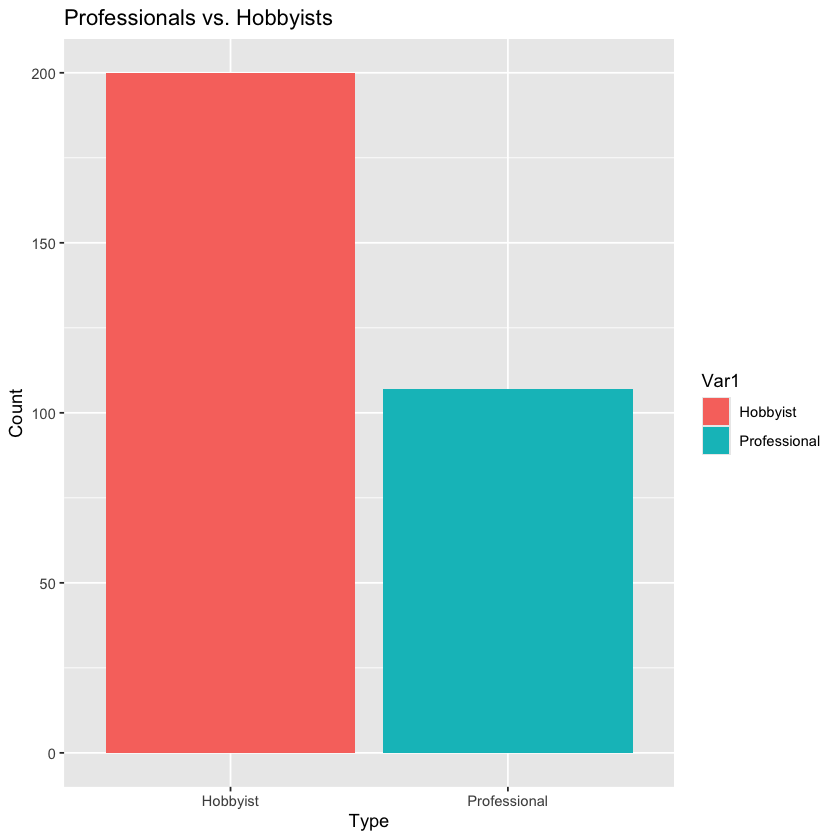

In [267]:
# Print the count of professionals vs. hobbyists
table(data[[5]])

# Plotting the count of professionals vs. hobbyists
ggplot(
  as.data.frame(table(data[[5]])),
  aes(x = Var1, y = Freq, fill = Var1)
) +
  geom_bar(stat = "identity") +
  labs(
    title = "Professionals vs. Hobbyists",
    x = "Type",
    y = "Count"
  )

## Primary area of work

Here it's column [6] "Primary area of work?" 

In [268]:
# Show the distribution of 'Primary area of work?' in number of respondents
primary_area_count <- table(data[6])

# Censor abusive language in [6]
names(primary_area_count)[6] <- "Censored"

# Print the raw count of respondents in each primary area of work
primary_area_count

                                      Art & Assets 
                                                35 
                                     Audio & Music 
                                                 3 
                                    Auto body, lol 
                                                 1 
                                           Defense 
                                                 1 
                               Design & Production 
                                                13 
                                          Censored 
                                                 1 
                                        Generalist 
                                                10 
                  Generalist (also solo developer) 
                                               125 
I work a full-time job and do game dev as a hobby. 
                                                 1 
                                    Marketing & PR 
            

### Manual clean up of categories

In [269]:
# Generalists
for (i in c(7, 9, 11, 12)) { # Combine the categories
  primary_area_count[8] <- primary_area_count[8] + primary_area_count[i]
}

# Rename to Generalists
names(primary_area_count)[8] <- "Generalists"

# Other
for (i in c(3, 4, 6, 14)) { # Combine the categories
  primary_area_count[15] <- primary_area_count[15] + primary_area_count[i]
}

# Rename to Other
names(primary_area_count)[15] <- "Other"

# Remove the categories that were combined
primary_area_count <- primary_area_count[-c(7, 9, 11, 12, 3, 4, 6, 14)]

# Output the cleaned up categories
primary_area_count

           Art & Assets           Audio & Music     Design & Production 
                     35                       3                      13 
            Generalists          Marketing & PR Technical & Programming 
                    138                       1                     112 
                  Other 
                      5 

### Visualizing the data

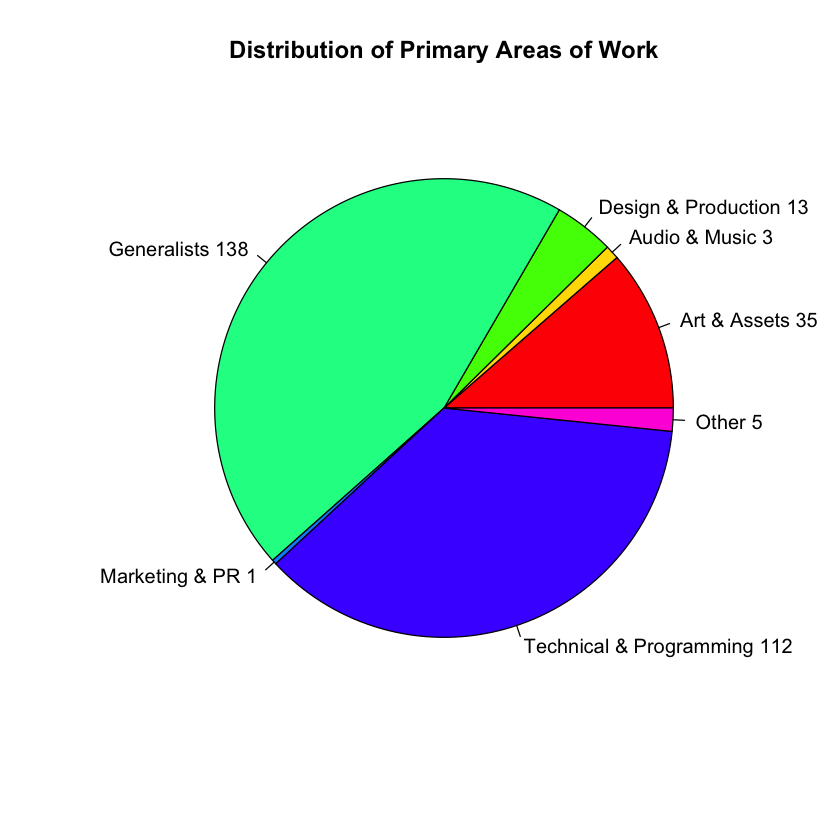

           Art & Assets           Audio & Music     Design & Production 
                     35                       3                      13 
            Generalists          Marketing & PR Technical & Programming 
                    138                       1                     112 
                  Other 
                      5 

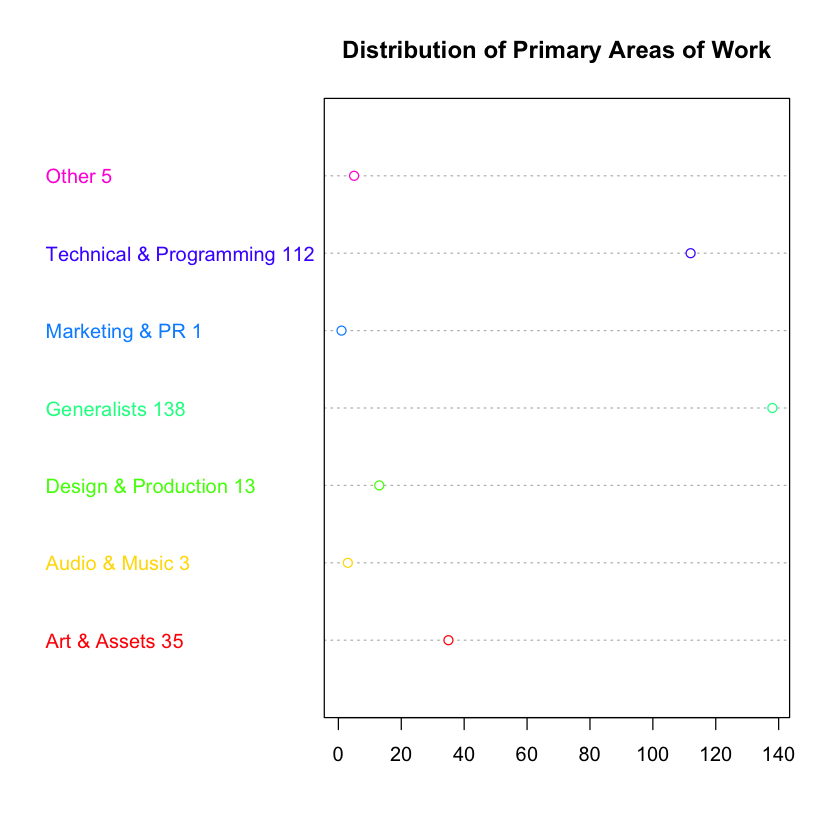

In [270]:
par(bg = "white") # White background

# Distribution of primary areas of work
pie(
  primary_area_count,
  labels = paste(names(primary_area_count), primary_area_count),
  col = rainbow(length(primary_area_count)),
  main = "Distribution of Primary Areas of Work"
)

# And as a dotchart
dotchart(
  primary_area_count,
  labels = paste(names(primary_area_count), primary_area_count),
  col = rainbow(length(primary_area_count)),
  main = "Distribution of Primary Areas of Work"
)

primary_area_count

## Distribution of Years of Experience
Here we're workin with column [7] "Years of experience in game development?"

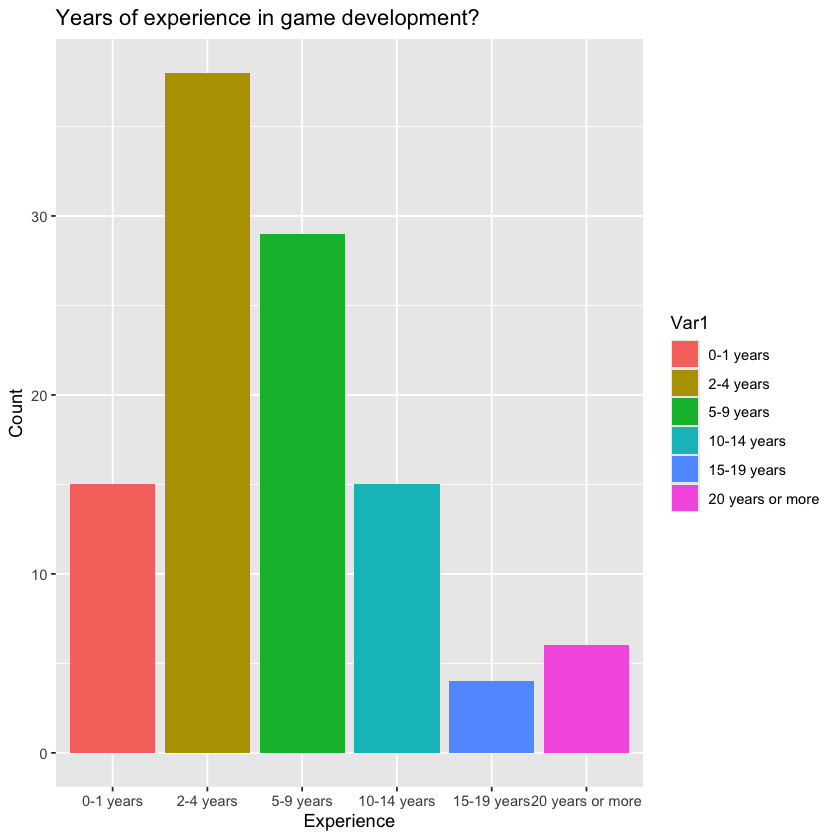

In [271]:
# Define the correct order for the levels
year_levels <- c(
  "0-1 years",
  "2-4 years",
  "5-9 years",
  "10-14 years",
  "15-19 years",
  "20 years or more"
)

# Convert the Years of experience column to a factor with specified levels
data[[7]] <- factor(data[[7]], levels = year_levels)

# Filter out 'Unknown' values
filtered_data <- data[!is.na(data[[7]]), ]

# Descriptive analysis: Distribution of years of experience
experience_distribution <- table(filtered_data[[7]])

# Plotting the distribution of years of experience
ggplot(
  as.data.frame(experience_distribution),
  aes(x = Var1, y = Freq, fill = Var1)
) +
  geom_bar(stat = "identity") +
  labs(
    title = "Years of experience in game development?",
    x = "Experience",
    y = "Count"
  )

## Overall Stance on Generative AI

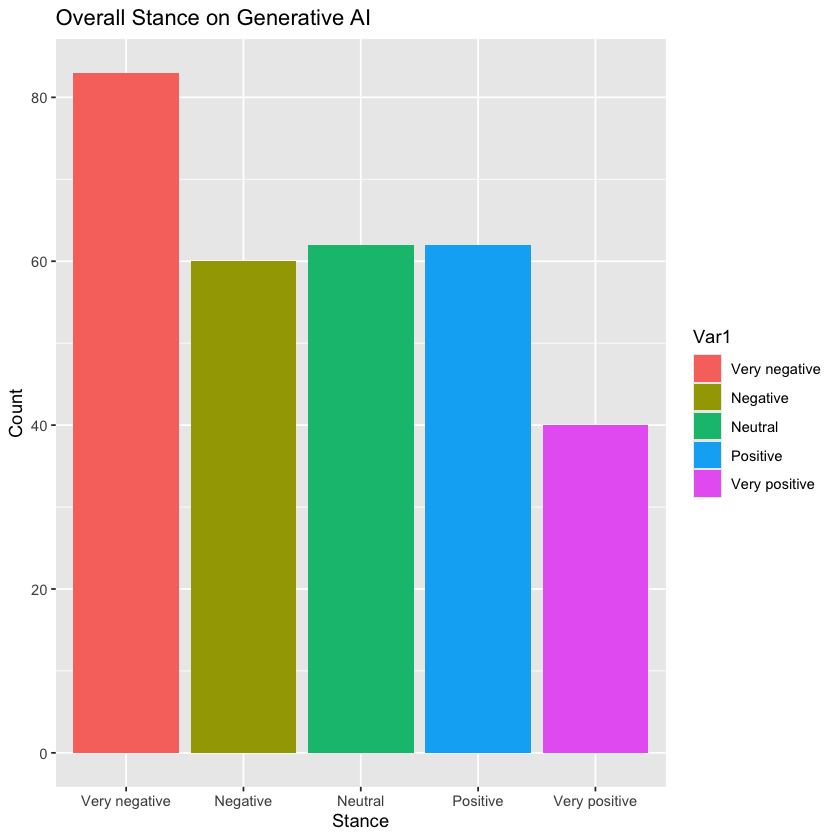

In [272]:
# Define the correct order for the levels
stance_levels <- c(
  "Very negative",
  "Negative",
  "Neutral",
  "Positive",
  "Very positive"
)

# Convert the 'Overall stance on Generative AI?2'
# column to a factor with specified levels
data[[10]] <- factor(data[[10]], levels = stance_levels)

# Exclude 'Unknown' values
filtered_data <- data[!is.na(data[[10]]), ]

# Descriptive analysis: Overall stance on Generative AI
stance_distribution <- table(filtered_data[[10]])

# Plotting the overall stance on Generative AI
ggplot(
  as.data.frame(stance_distribution),
  aes(x = Var1, y = Freq, fill = Var1)
) +
  geom_bar(stat = "identity") +
  labs(title = "Overall Stance on Generative AI", x = "Stance", y = "Count")

## Correlation Analysis

In [273]:
# Convert categorical data to numeric for correlation analysis
data_numeric <- data %>%
  mutate(
    YearsExperience = case_when(
      .[[7]] == "0-1 years" ~ 1,
      .[[7]] == "2-4 years" ~ 2,
      .[[7]] == "5-9 years" ~ 3,
      .[[7]] == "10-14 years" ~ 4,
      .[[7]] == "15-19 years" ~ 5,
      .[[7]] == "20 years or more" ~ 6,
      TRUE ~ 0
    ),
    StanceOnGenAI = case_when(
      .[[10]] == "Very positive" ~ 5,
      .[[10]] == "Positive" ~ 4,
      .[[10]] == "Neutral" ~ 3,
      .[[10]] == "Negative" ~ 2,
      .[[10]] == "Very negative" ~ 1,
      TRUE ~ 0
    )
  )

# Calculate correlation
correlation <- cor(
  data_numeric$YearsExperience,
  data_numeric$StanceOnGenAI,
  method = "spearman",
  use = "complete.obs"
)

print(correlation)


[1] -0.08107992


## Sentiment Analysis

### Wordcloud

#### "What do you think will be the most promising innovations from Generative AI in game development?" 

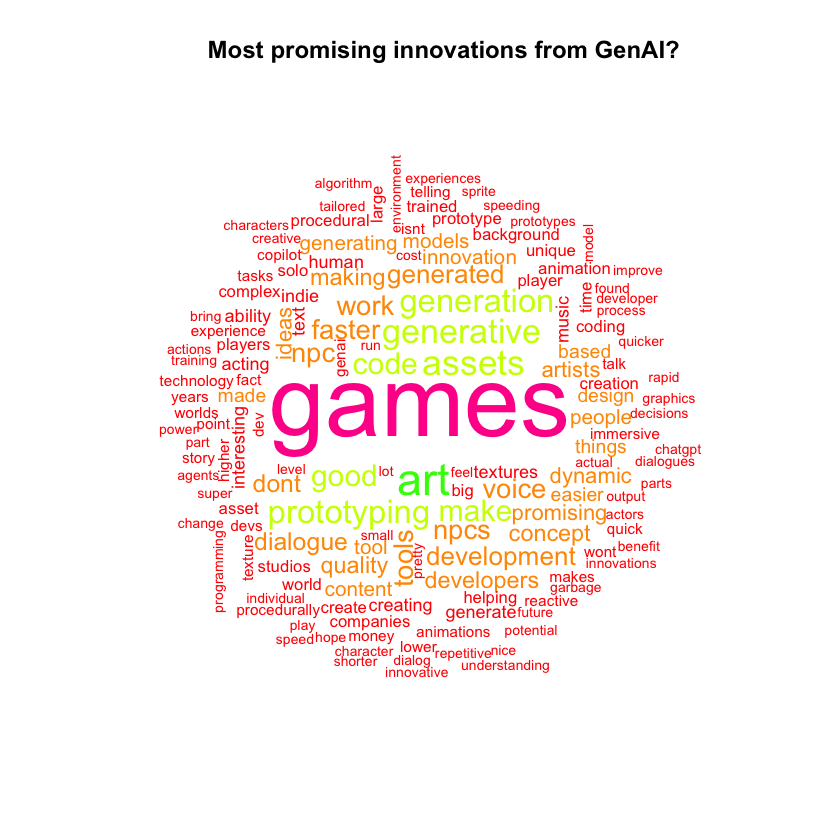

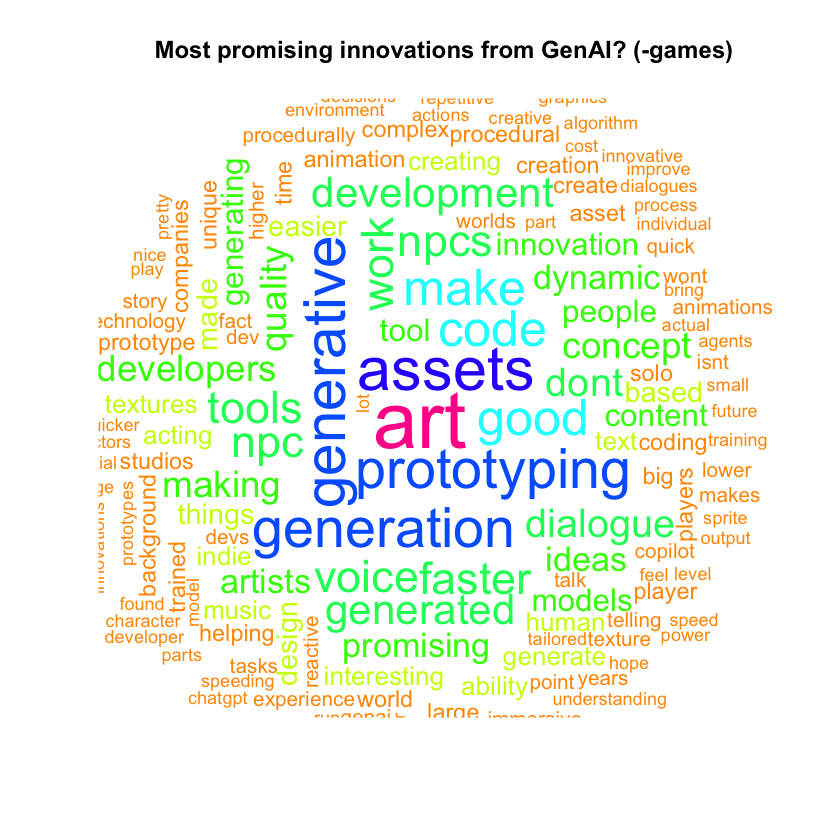

In [274]:
# Preprocess the text data 
data[[45]] <- iconv(data[[45]], "latin1", "UTF-8") # Convert to UTF-8
data[[45]] <- tolower(data[[45]]) # Convert to lowercase
data[[45]] <- removePunctuation(data[[45]]) # Remove punctuation
data[[45]] <- removeNumbers(data[[45]]) # Remove numbers
data[[45]] <- removeWords(data[[45]], stopwords("smart")) # Remove stopwords
data[[45]] <- gsub("\\bgame\\b", "games", data[[45]]) # turn game into games
data[[45]] <- stripWhitespace(data[[45]]) # Remove extra whitespaces

par(bg = "white") # White background

# Create a wordcloud
wordcloud(
  data[[45]],
  colors = rainbow(10),
  random.order = FALSE,
  scale = c(5, 0.5),
  max.words = 250
)

# Add a title to the wordcloud
title(main = "Most promising innovations from GenAI?")

# now withouth "games"
data[[45]] <- removeWords(data[[45]], "games")

wordcloud(
  data[[45]],
  colors = rainbow(10),
  random.order = FALSE,
  scale = c(4, 0.5),
  max.words = 250
)

# Add a title to the wordcloud
title(main = "Most promising innovations from GenAI? (-games)")

#### "What do you think will be the most negative consequences of Generative AI in game development?"

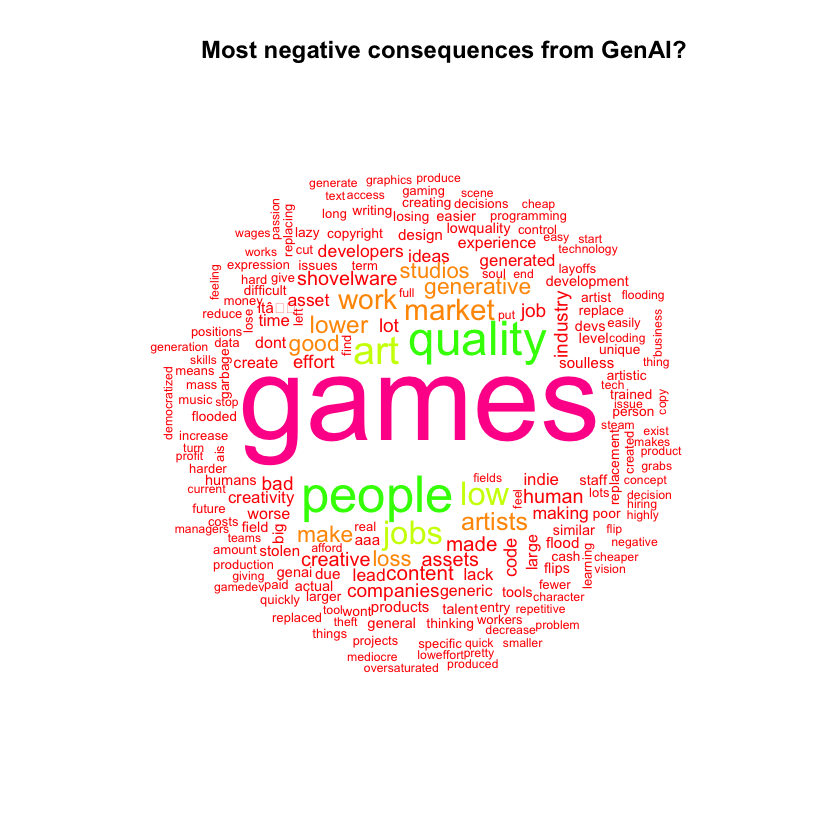

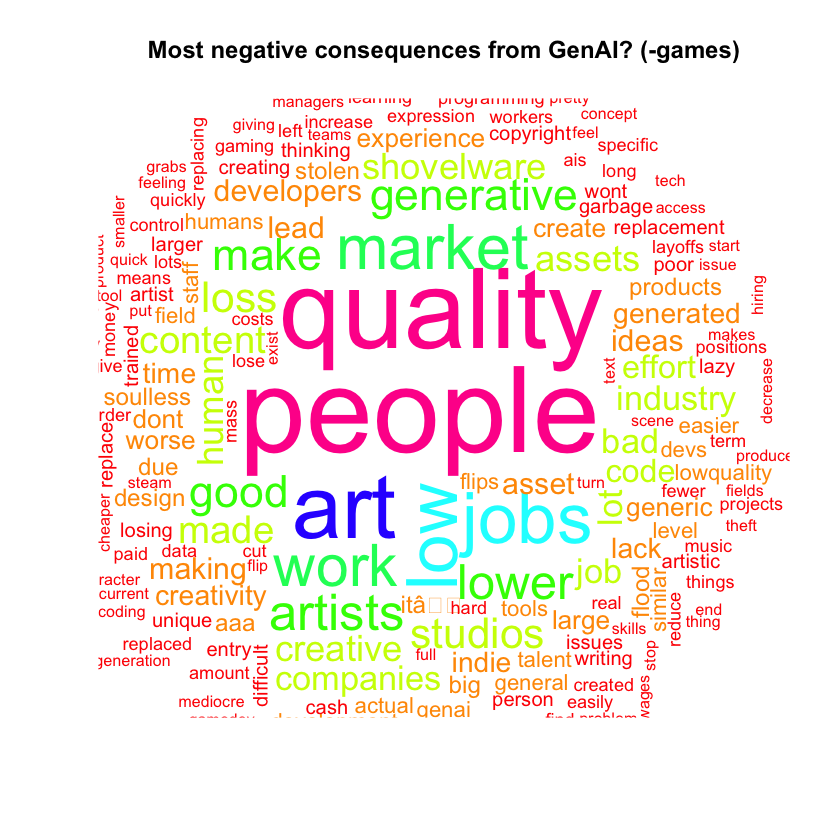

In [275]:
# wordcloud
# Preprocess the text data
data[[46]] <- iconv(data[[46]], "latin1", "UTF-8") # Convert to UTF-8
data[[46]] <- tolower(data[[46]]) # Convert to lowercase
data[[46]] <- removePunctuation(data[[46]]) # Remove punctuation
data[[46]] <- removeNumbers(data[[46]]) # Remove numbers
data[[46]] <- removeWords(data[[46]], stopwords("smart")) # Remove stopwords
data[[46]] <- gsub("\\bgame\\b", "games", data[[46]]) # turn game into games
data[[46]] <- stripWhitespace(data[[46]]) # Remove extra whitespaces

par(bg = "white") # White background

# Create a wordcloud
wordcloud(
  data[[46]],
  colors = rainbow(10),
  random.order = FALSE,
  scale = c(6, 0.5),
  max.words = 250
)

# Add a title to the wordcloud
title(main = "Most negative consequences from GenAI?")

# now withouth "games"
data[[46]] <- removeWords(data[[46]], "games")

wordcloud(
  data[[46]],
  colors = rainbow(10),
  random.order = FALSE,
  scale = c(6, 0.5),
  max.words = 250
)

# Add a title to the wordcloud
title(main = "Most negative consequences from GenAI? (-games)")


       anger anticipation      disgust         fear          joy      sadness 
          23           87           22           28           85           48 
    surprise        trust     negative     positive 
          63          100           66          234 


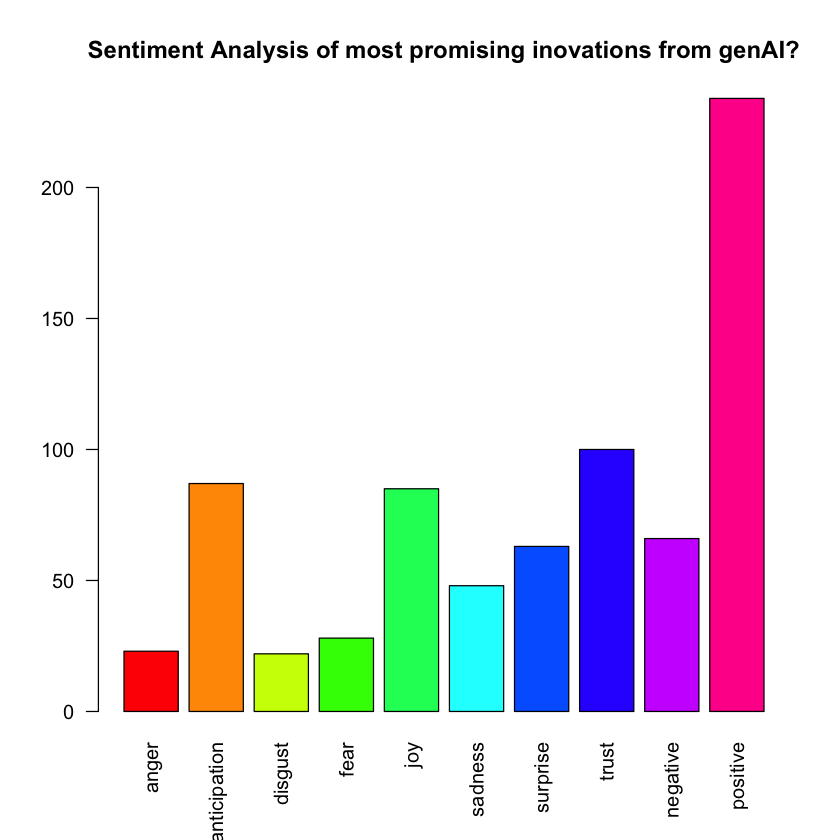

In [276]:
# Extract open-ended responses
open_ended_responses <- data[[45]]

# Perform sentiment analysis
sentiment_scores_0 <- get_nrc_sentiment(open_ended_responses)

# Summarize sentiment scores
sentiment_summary_0 <- colSums(sentiment_scores_0)
print(sentiment_summary_0)

par(bg = "white") # White background

# Plot sentiment scores
barplot(
  sentiment_summary_0,
  las = 2,
  col = rainbow(10),
  main = "Sentiment Analysis of most promising inovations from genAI?"
)


       anger anticipation      disgust         fear          joy      sadness 
          89          143           71          107          119          147 
    surprise        trust     negative     positive 
          83          137          226          329 


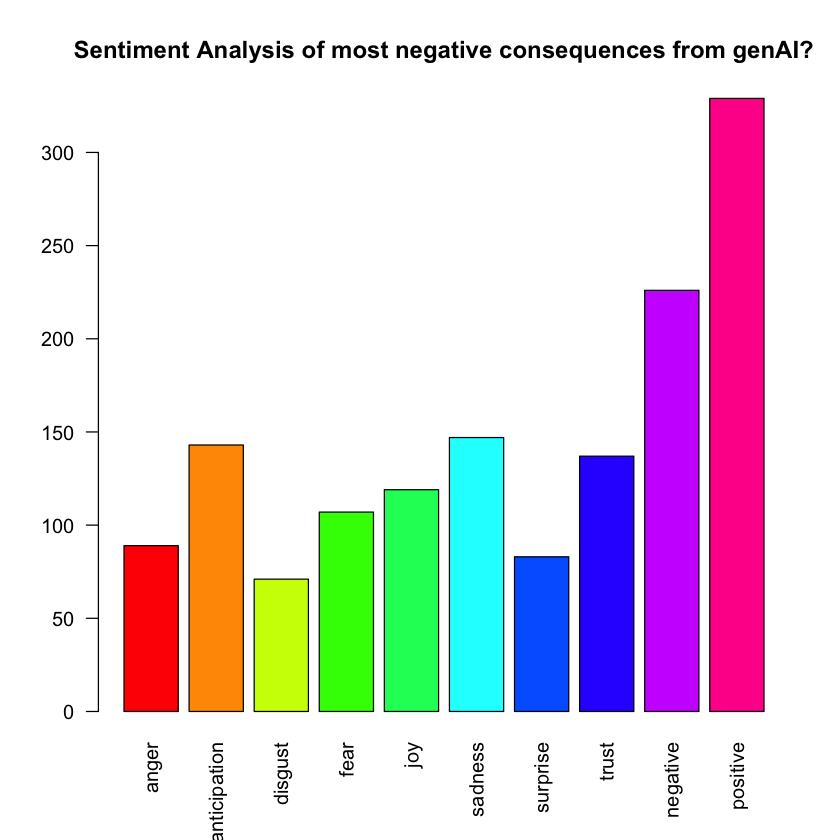

In [277]:
# Extract open-ended responses
open_ended_responses <- data[[46]]

# Perform sentiment analysis
sentiment_scores_1 <- get_nrc_sentiment(open_ended_responses)

# Summarize sentiment scores
sentiment_summary_1 <- colSums(sentiment_scores_1)
print(sentiment_summary_1)

par(bg = "white") # White background

# Plot sentiment scores
barplot(
  sentiment_summary_1,
  las = 2,
  col = rainbow(10),
  main = "Sentiment Analysis of most negative consequences from genAI?"
)

       anger anticipation      disgust         fear          joy      sadness 
          24           96           25           36           94           56 
    surprise        trust     negative     positive 
          42          117           75          276 


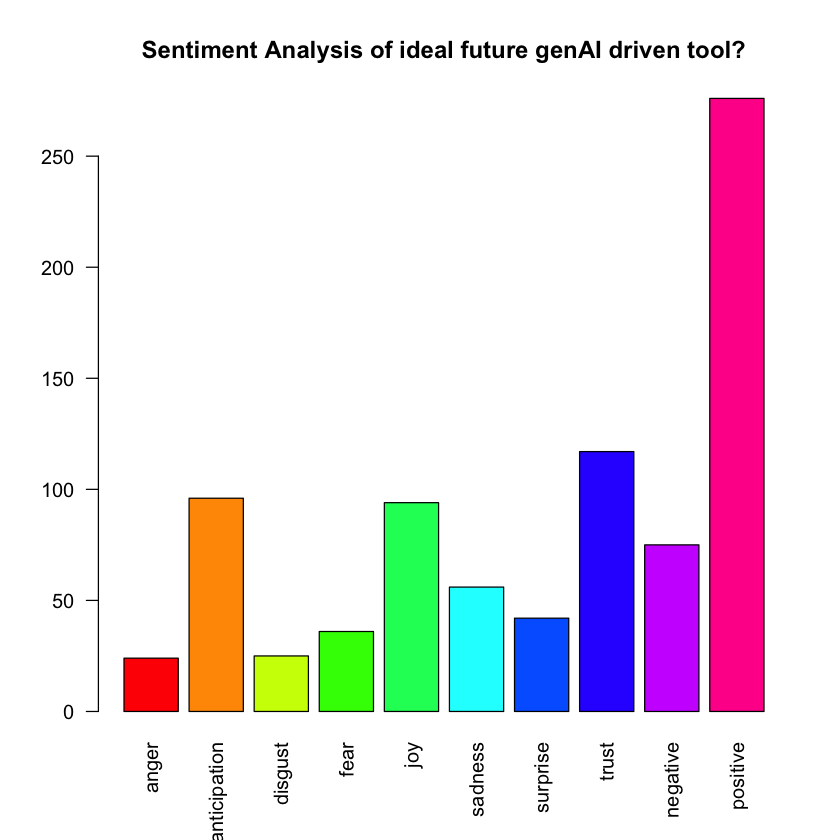

In [278]:
# Extract open-ended responses
open_ended_responses <- data[[50]]

# Perform sentiment analysis
sentiment_scores_2 <- get_nrc_sentiment(open_ended_responses)

# Summarize sentiment scores
sentiment_summary_2 <- colSums(sentiment_scores_2)
print(sentiment_summary_2)

par(bg = "white") # White background

# Plot sentiment scores
barplot(
  sentiment_summary_2,
  las = 2,
  col = rainbow(10),
  main = "Sentiment Analysis of ideal future genAI driven tool?"
)


       anger anticipation      disgust         fear          joy      sadness 
          23           59           26           32           43           44 
    surprise        trust     negative     positive 
          29           74           58          145 


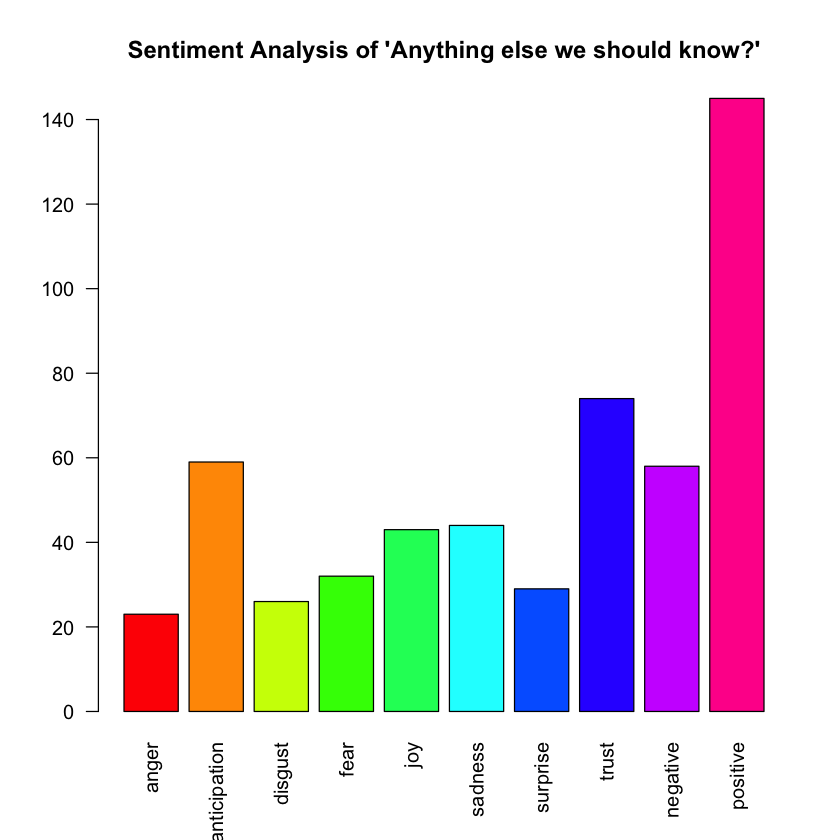

In [279]:
# Extract open-ended responses
open_ended_responses <- data[[52]]

# Perform sentiment analysis
sentiment_scores_3 <- get_nrc_sentiment(open_ended_responses)

# Summarize sentiment scores
sentiment_summary_3 <- colSums(sentiment_scores_3)
print(sentiment_summary_3)

par(bg = "white") # White background

# Plot sentiment scores
barplot(
  sentiment_summary_3,
  las = 2,
  col = rainbow(10),
  main = "Sentiment Analysis of 'Anything else we should know?'"
)


## Group Comparisons

[1] "Average stance on GenAI for professionals: 2.5981308411215"
[1] "Average stance on GenAI for hobbyists: 2.795"

	Welch Two Sample t-test

data:  professionals$StanceOnGenAI and hobbyists$StanceOnGenAI
t = -1.1712, df = 210.38, p-value = 0.2428
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5282309  0.1344926
sample estimates:
mean of x mean of y 
 2.598131  2.795000 



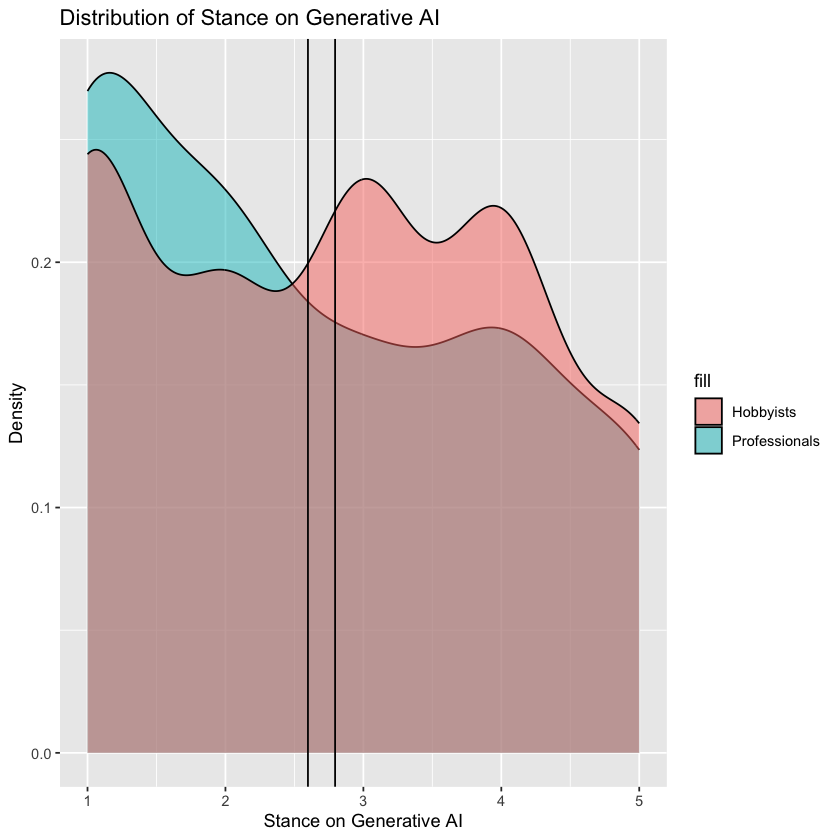

In [280]:
# Define the correct order for the levels
stance_levels <- c(
  "Very negative",
  "Negative",
  "Neutral",
  "Positive",
  "Very positive"
)

# Convert the 'Overall stance on GenAI' column to a factor with specified levels
data[[10]] <- factor(data[[10]], levels = stance_levels)

# Convert categorical data to numeric for stance on Generative AI
data <- data %>%
  mutate(
    StanceOnGenAI = case_when(
      .[[10]] == "Very positive" ~ 5,
      .[[10]] == "Positive" ~ 4,
      .[[10]] == "Neutral" ~ 3,
      .[[10]] == "Negative" ~ 2,
      .[[10]] == "Very negative" ~ 1,
      TRUE ~ NA_real_
    )
  )

# Filter data for professionals and hobbyists
professionals <- data %>% filter(data[[5]] == "Professional")
hobbyists <- data %>% filter(data[[5]] == "Hobbyist")

# Calculate average stance on Generative AI
avg_stance_professionals <- mean(professionals$StanceOnGenAI, na.rm = TRUE)
avg_stance_hobbyists <- mean(hobbyists$StanceOnGenAI, na.rm = TRUE)

print(
  paste(
    "Average stance on GenAI for professionals:",
    avg_stance_professionals
  )
)
print(
  paste(
    "Average stance on GenAI for hobbyists:",
    avg_stance_hobbyists
  )
)

# Perform a t-test to compare the average stance
# on Generative AI between professionals and hobbyists
t_test_result <- t.test(
  professionals$StanceOnGenAI,
  hobbyists$StanceOnGenAI,
  alternative = "two.sided",
  mu = 0,
  conf.level = 0.95
)

# Print the t-test results
print(t_test_result)

# visualize the t-test results
ggplot() +
  geom_density(
    aes(x = professionals$StanceOnGenAI, fill = "Professionals"),
    alpha = 0.5
  ) +
  geom_density(
    aes(x = hobbyists$StanceOnGenAI, fill = "Hobbyists"),
    alpha = 0.5
  ) +
  geom_vline(
    xintercept = t_test_result$estimate,
  ) +
  labs(
    title = "Distribution of Stance on Generative AI",
    x = "Stance on Generative AI",
    y = "Density"
  )


### Stance on Generative AI vs. Years of Experience

We'll be working with [7] "Years of experience in game development?" and [10] "Overall stance on Generative AI?2"

In [281]:
# Factorize the 'Years of experience' and 'Stance on GenAI' columns
data <- data %>%
  mutate(
    ExperienceGroup = factor(data[[7]]),
    StanceOnGenAI = as.numeric(data[[10]])
  )

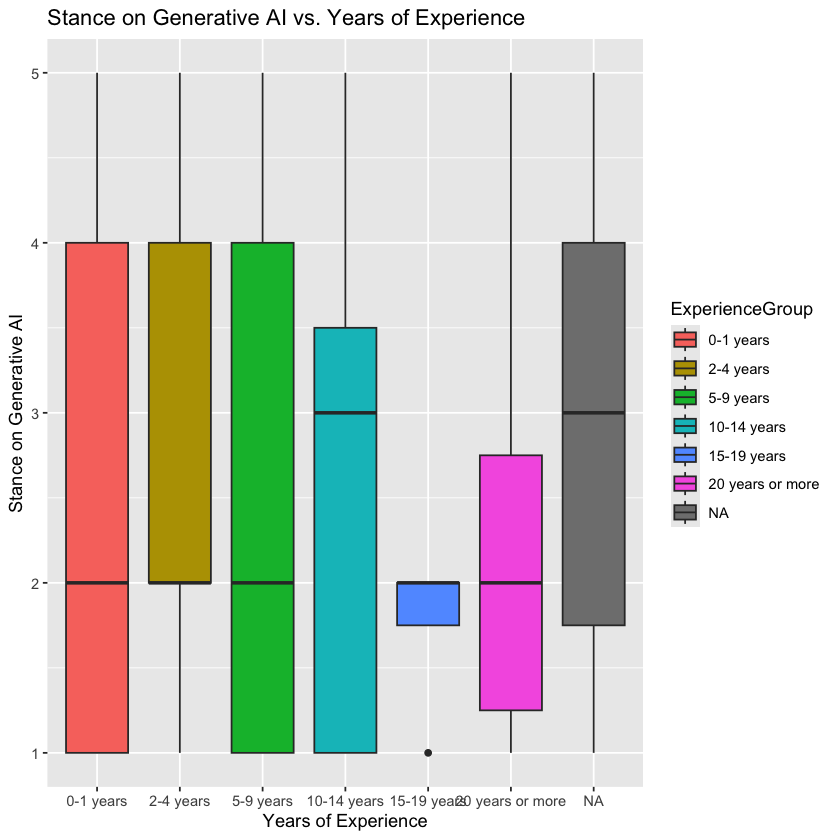

In [282]:
# Boxplot for Stance on GenAI vs. Experience Group
ggplot(
  data, aes(
    x = ExperienceGroup,
    y = StanceOnGenAI,
    fill = ExperienceGroup
  )
) +
  geom_boxplot() +
  labs(
    title = "Stance on Generative AI vs. Years of Experience",
    x = "Years of Experience",
    y = "Stance on Generative AI"
  )

In [283]:
# ANOVA test for Stance on GenAI vs. Experience Group
anova_result <- aov(StanceOnGenAI ~ ExperienceGroup, data = data)
summary(anova_result)

                 Df Sum Sq Mean Sq F value Pr(>F)
ExperienceGroup   5   4.11   0.823   0.397   0.85
Residuals       101 209.60   2.075               
200 observations deleted due to missingness

### Main area of work VS Stance on GenAI
Here it's [6] "Primary area of work?" and [10] "Overall stance on Generative AI?2"


	Welch Two Sample t-test

data:  StanceOnGenAI by UsesGenAI
t = -12.196, df = 251.95, p-value < 2.2e-16
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 -1.891231 -1.365338
sample estimates:
 mean in group No mean in group Yes 
         2.100529          3.728814 



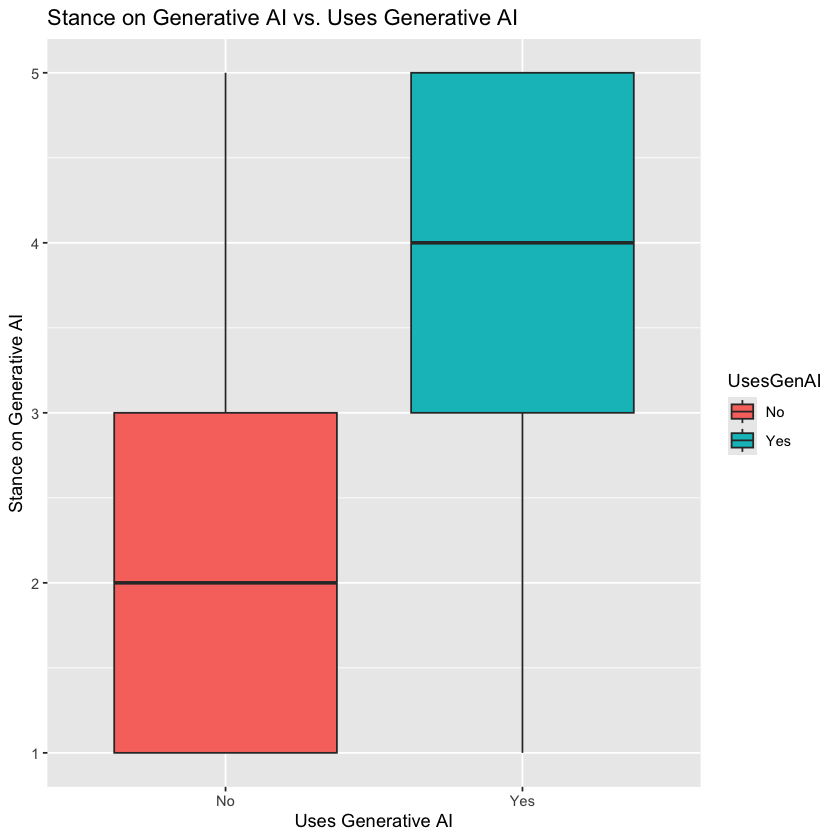

In [284]:
# Konverter relevante kolonner til faktorer
data <- data %>%
  mutate(
    UsesGenAI = factor(`Do you use Generative AI in your work?`),
    StanceOnGenAI = as.numeric(`Overall stance on Generative AI?2`)
  )

# Boxplot for Stance on GenAI vs. Uses GenAI
ggplot(data, aes(x = UsesGenAI, y = StanceOnGenAI, fill = UsesGenAI)) +
  geom_boxplot() +
  labs(
    title = "Stance on Generative AI vs. Uses Generative AI",
    x = "Uses Generative AI",
    y = "Stance on Generative AI"
  )

# T-test for Stance on GenAI vs. Uses GenAI
t_test_result <- t.test(StanceOnGenAI ~ UsesGenAI, data = data)
print(t_test_result)


In [285]:
# Define the levels for the factor
agree_levels <- c(
  "Strongly disagree",
  "Disagree",
  "Neutral",
  "Agree",
  "Strongly agree"
)

# A tibble: 2 x 9
  UsesGenAI MeanShortenTimelines MeanIndividualizedExperien~1 MeanImpactStaffing
  <fct>                    <dbl>                        <dbl>              <dbl>
1 No                        2.85                         2.14               4.12
2 Yes                       4.01                         3.36               3.99
# i abbreviated name: 1: MeanIndividualizedExperiences
# i 5 more variables: MeanSmallerTeams <dbl>, MeanDemocratizeDevelopment <dbl>,
#   MeanCheaperDevelopment <dbl>, MeanLowerQuality <dbl>, MeanBetterGames <dbl>


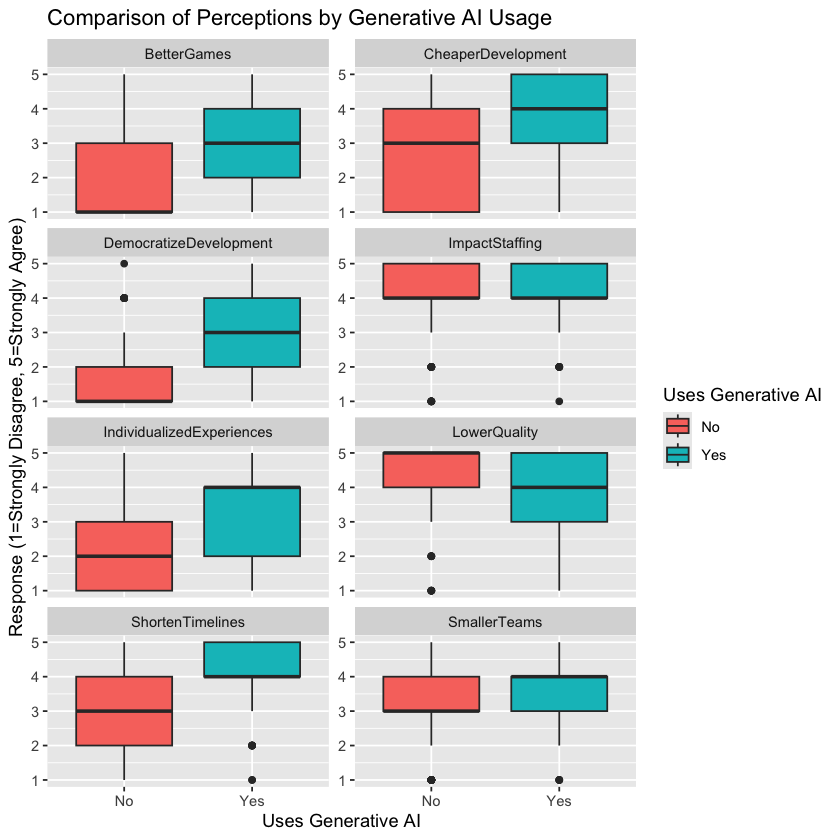

In [286]:
# Convert relevant columns to numeric
data <- data %>%
  mutate(
    UsesGenAI = factor(`Do you use Generative AI in your work?`),
    ShortenTimelines = as.numeric(factor(
      `It will help shorten development timelines`,
      agree_levels
    )),
    IndividualizedExperiences = as.numeric(factor(
      `It will lead to more individualized gaming experiences`,
      agree_levels
    )),
    ImpactStaffing = as.numeric(factor(
      `It will impact staffing decisions`,
      agree_levels
    )),
    SmallerTeams = as.numeric(factor(
      `It will lead to smaller team sizes`,
      agree_levels
    )),
    DemocratizeDevelopment = as.numeric(factor(
      `It will democratize game development`,
      agree_levels
    )),
    CheaperDevelopment = as.numeric(factor(
      `It will make it cheaper to develop games`,
      agree_levels
    )),
    LowerQuality = as.numeric(factor(
      `It will lead to lower quality games`,
      agree_levels
    )),
    BetterGames = as.numeric(factor(
      `It will lead to better games`,
      agree_levels
    ))
  )

# Calculate mean responses for each question grouped by UsesGenAI
mean_responses <- data %>%
  group_by(UsesGenAI) %>%
  summarise(
    MeanShortenTimelines = mean(
      ShortenTimelines,
      na.rm = TRUE
    ),
    MeanIndividualizedExperiences = mean(
      IndividualizedExperiences,
      na.rm = TRUE
    ),
    MeanImpactStaffing = mean(
      ImpactStaffing,
      na.rm = TRUE
    ),
    MeanSmallerTeams = mean(
      SmallerTeams,
      na.rm = TRUE
    ),
    MeanDemocratizeDevelopment = mean(
      DemocratizeDevelopment,
      na.rm = TRUE
    ),
    MeanCheaperDevelopment = mean(
      CheaperDevelopment,
      na.rm = TRUE
    ),
    MeanLowerQuality = mean(
      LowerQuality,
      na.rm = TRUE
    ),
    MeanBetterGames = mean(
      BetterGames,
      na.rm = TRUE
    )
  )

print(mean_responses)

# Pivot the data to a long format for plotting
data_long <- data %>%
  pivot_longer(
    cols = starts_with("ShortenTimelines"):starts_with("BetterGames"),
    names_to = "Question",
    values_to = "Response"
  )

# Improve the plot layout and labels
ggplot(data_long, aes(x = UsesGenAI, y = Response, fill = UsesGenAI)) +
  geom_boxplot() +
  facet_wrap(~Question, scales = "free_y", ncol = 2) +
  labs(
    title = "Comparison of Perceptions by Generative AI Usage",
    x = "Uses Generative AI",
    y = "Response (1=Strongly Disagree, 5=Strongly Agree)",
    fill = "Uses Generative AI"
  )


# A tibble: 3 x 9
  LeadRole MeanShortenTimelines MeanIndividualizedExperiences MeanImpactStaffing
  <fct>                   <dbl>                         <dbl>              <dbl>
1 No                       3.36                          2.89               4.20
2 Yes                      3.14                          2.32               3.86
3 Hobbyist                 3.33                          2.64               4.11
# i 5 more variables: MeanSmallerTeams <dbl>, MeanDemocratizeDevelopment <dbl>,
#   MeanCheaperDevelopment <dbl>, MeanLowerQuality <dbl>, MeanBetterGames <dbl>


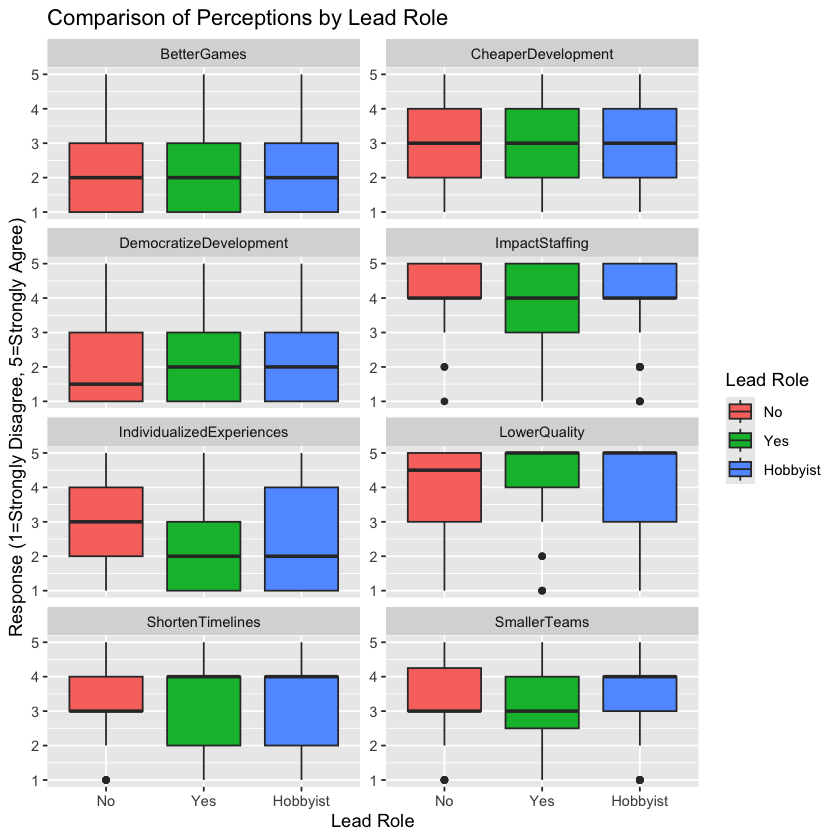

In [287]:
# Custom function to convert columns to numeric factor levels
convert_to_numeric <- function(column, levels) {
  as.numeric(factor(column, levels = levels))
}

# Convert relevant columns to factors and numeric
data <- data %>%
  mutate(
    LeadRole = ifelse(
      is.na(`Are you in a lead role?`),
      "Hobbyist", as.character(`Are you in a lead role?`)
    ),
    LeadRole = factor(LeadRole, levels = c("No", "Yes", "Hobbyist")),
    ShortenTimelines = convert_to_numeric(
      `It will help shorten development timelines`,
      agree_levels
    ),
    IndividualizedExperiences = convert_to_numeric(
      `It will lead to more individualized gaming experiences`,
      agree_levels
    ),
    ImpactStaffing = convert_to_numeric(
      `It will impact staffing decisions`,
      agree_levels
    ),
    SmallerTeams = convert_to_numeric(
      `It will lead to smaller team sizes`,
      agree_levels
    ),
    DemocratizeDevelopment = convert_to_numeric(
      `It will democratize game development`,
      agree_levels
    ),
    CheaperDevelopment = convert_to_numeric(
      `It will make it cheaper to develop games`,
      agree_levels
    ),
    LowerQuality = convert_to_numeric(
      `It will lead to lower quality games`,
      agree_levels
    ),
    BetterGames = convert_to_numeric(
      `It will lead to better games`,
      agree_levels
    )
  )

# Calculate mean responses for each question grouped by LeadRole
mean_responses_lead <- data %>%
  group_by(LeadRole) %>%
  summarise(
    MeanShortenTimelines = mean(
      ShortenTimelines,
      na.rm = TRUE
    ),
    MeanIndividualizedExperiences = mean(
      IndividualizedExperiences,
      na.rm = TRUE
    ),
    MeanImpactStaffing = mean(
      ImpactStaffing,
      na.rm = TRUE
    ),
    MeanSmallerTeams = mean(
      SmallerTeams,
      na.rm = TRUE
    ),
    MeanDemocratizeDevelopment = mean(
      DemocratizeDevelopment,
      na.rm = TRUE
    ),
    MeanCheaperDevelopment = mean(
      CheaperDevelopment,
      na.rm = TRUE
    ),
    MeanLowerQuality = mean(
      LowerQuality,
      na.rm = TRUE
    ),
    MeanBetterGames = mean(
      BetterGames,
      na.rm = TRUE
    )
  )

print(mean_responses_lead)

# Pivot the data to a long format for plotting
data_long_lead <- data %>%
  pivot_longer(
    cols = ShortenTimelines:BetterGames,
    names_to = "Question",
    values_to = "Response"
  )

# Plot each question in a facet grid
ggplot(data_long_lead, aes(x = LeadRole, y = Response, fill = LeadRole)) +
  geom_boxplot() +
  facet_wrap(~Question, scales = "free_y", ncol = 2) +
  labs(
    title = "Comparison of Perceptions by Lead Role",
    x = "Lead Role",
    y = "Response (1=Strongly Disagree, 5=Strongly Agree)",
    fill = "Lead Role"
  )


In [288]:
# Filter out hobbyists for the t-tests
data_filtered <- data %>%
  filter(LeadRole %in% c("No", "Yes"))

# Perform t-tests for each question
t_test_results <- list()

questions <- c(
  "ShortenTimelines",
  "IndividualizedExperiences",
  "ImpactStaffing",
  "SmallerTeams",
  "DemocratizeDevelopment",
  "CheaperDevelopment",
  "LowerQuality",
  "BetterGames"
)

for (question in questions) {
  t_test_result <- t.test(get(question) ~ LeadRole, data = data_filtered)
  t_test_results[[question]] <- t_test_result
}

# Print t-test results
for (question in questions) {
  print(paste("T-test for", question))
  print(t_test_results[[question]])
}

[1] "T-test for ShortenTimelines"

	Welch Two Sample t-test

data:  get(question) by LeadRole
t = 0.90523, df = 92.772, p-value = 0.3677
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 -0.2635614  0.7051199
sample estimates:
 mean in group No mean in group Yes 
         3.363636          3.142857 

[1] "T-test for IndividualizedExperiences"

	Welch Two Sample t-test

data:  get(question) by LeadRole
t = 2.2615, df = 90.679, p-value = 0.02612
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 0.06918259 1.06862405
sample estimates:
 mean in group No mean in group Yes 
         2.886364          2.317460 

[1] "T-test for ImpactStaffing"

	Welch Two Sample t-test

data:  get(question) by LeadRole
t = 1.7029, df = 101.76, p-value = 0.09163
alternative hypothesis: true difference in means between group No and group Yes is not equ

[1] "ANOVA for ShortenTimelines"
             Df Sum Sq Mean Sq F value Pr(>F)
TeamSize      5   7.83   1.566   1.019  0.411
Residuals   101 155.33   1.538               
[1] "ANOVA for IndividualizedExperiences"
             Df Sum Sq Mean Sq F value Pr(>F)
TeamSize      5  12.56   2.512   1.529  0.187
Residuals   101 165.91   1.643               
[1] "ANOVA for ImpactStaffing"
             Df Sum Sq Mean Sq F value Pr(>F)
TeamSize      5   9.38   1.876   1.653  0.153
Residuals   101 114.62   1.135               
[1] "ANOVA for SmallerTeams"
             Df Sum Sq Mean Sq F value Pr(>F)
TeamSize      5  12.69   2.538   1.769  0.126
Residuals   101 144.86   1.434               
[1] "ANOVA for DemocratizeDevelopment"
             Df Sum Sq Mean Sq F value Pr(>F)
TeamSize      5   9.87   1.975   1.225  0.303
Residuals   101 162.89   1.613               
[1] "ANOVA for CheaperDevelopment"
             Df Sum Sq Mean Sq F value Pr(>F)
TeamSize      5   6.94   1.389   0.754  0.585
Residuals

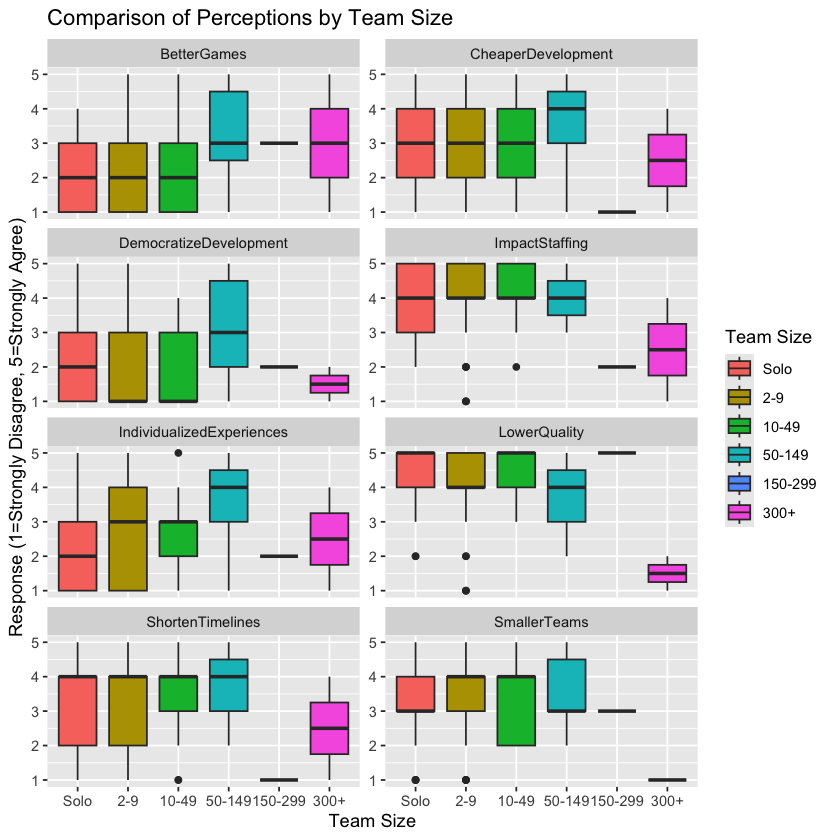

In [289]:
# Convert relevant columns to factors and numeric, and filter out hobbyists
data <- data %>%
  mutate(
    TeamSize = factor(
      `Team size?`,
      levels = c(
        "Solo",
        "2-9",
        "10-49",
        "50-149",
        "150-299",
        "300+"
      )
    ),
    ShortenTimelines = as.numeric(factor(
      `It will help shorten development timelines`,
      agree_levels
    )),
    IndividualizedExperiences = as.numeric(factor(
      `It will lead to more individualized gaming experiences`,
      agree_levels
    )),
    ImpactStaffing = as.numeric(factor(
      `It will impact staffing decisions`,
      agree_levels
    )),
    SmallerTeams = as.numeric(factor(
      `It will lead to smaller team sizes`,
      agree_levels
    )),
    DemocratizeDevelopment = as.numeric(factor(
      `It will democratize game development`,
      agree_levels
    )),
    CheaperDevelopment = as.numeric(factor(
      `It will make it cheaper to develop games`,
      agree_levels
    )),
    LowerQuality = as.numeric(factor(
      `It will lead to lower quality games`,
      agree_levels
    )),
    BetterGames = as.numeric(factor(
      `It will lead to better games`,
      agree_levels
    ))
  ) %>%
  filter(!is.na(TeamSize))

# Perform ANOVA for each question
anova_results <- list()

questions <- c(
  "ShortenTimelines",
  "IndividualizedExperiences",
  "ImpactStaffing",
  "SmallerTeams",
  "DemocratizeDevelopment",
  "CheaperDevelopment",
  "LowerQuality",
  "BetterGames"
)

for (question in questions) {
  anova_result <- aov(get(question) ~ TeamSize, data = data)
  anova_results[[question]] <- summary(anova_result)
}

# Print ANOVA results
for (question in questions) {
  print(paste("ANOVA for", question))
  print(anova_results[[question]])
}

# Pivot the data to a long format for plotting
data_long_team <- data %>%
  pivot_longer(
    cols = starts_with("ShortenTimelines"):starts_with("BetterGames"),
    names_to = "Question",
    values_to = "Response"
  )

# Plot each question in a facet grid
ggplot(data_long_team, aes(x = TeamSize, y = Response, fill = TeamSize)) +
  geom_boxplot() +
  facet_wrap(~Question, scales = "free_y", ncol = 2) +
  labs(
    title = "Comparison of Perceptions by Team Size",
    x = "Team Size",
    y = "Response (1=Strongly Disagree, 5=Strongly Agree)",
    fill = "Team Size"
  )


## How useful GenAI are in different areas

#### Prepare data

In [290]:
# Define usefulness columns
usefulness_columns <- c(
  "Art & Assets",
  "Level Design",
  "Storytelling",
  "Sound Design",
  "Voice Overs & Acting",
  "Programming",
  "Game Design",
  "Marketing & PR",
  "Music",
  "Community management",
  "Initial prototyping"
)

# Convert usefulness columns to factors with specific levels
data <- data %>%
  mutate(across(
    all_of(usefulness_columns),
    ~ factor(., levels = c(
      "Not useful",
      "Somewhat useful",
      "Very useful"
    ))
  ))

# Map categorical responses to numeric values
usefulness_mapping <- c(
  "Not useful" = 1,
  "Somewhat useful" = 2,
  "Very useful" = 3
)

data <- data %>%
  mutate(across(
    all_of(usefulness_columns),
    ~ usefulness_mapping[as.character(.)]
  ))


#### Calculate Average Usefulness Scores

In [291]:
# Calculate mean usefulness scores for each area using updated syntax
mean_usefulness_scores <- data %>%
  summarise(across(
    all_of(usefulness_columns),
    \(x) mean(x, na.rm = TRUE)
  )) %>%
  pivot_longer(
    cols = everything(),
    names_to = "Area",
    values_to = "MeanScore"
  )

# Print mean usefulness scores to check for anomalies
print(mean_usefulness_scores)


# A tibble: 11 x 2
   Area                 MeanScore
   <chr>                    <dbl>
 1 Art & Assets              1.83
 2 Level Design              1.39
 3 Storytelling              1.52
 4 Sound Design              1.44
 5 Voice Overs & Acting      1.66
 6 Programming               1.93
 7 Game Design               1.28
 8 Marketing & PR            1.51
 9 Music                     1.35
10 Community management      1.35
11 Initial prototyping       1.91


#### Visualization

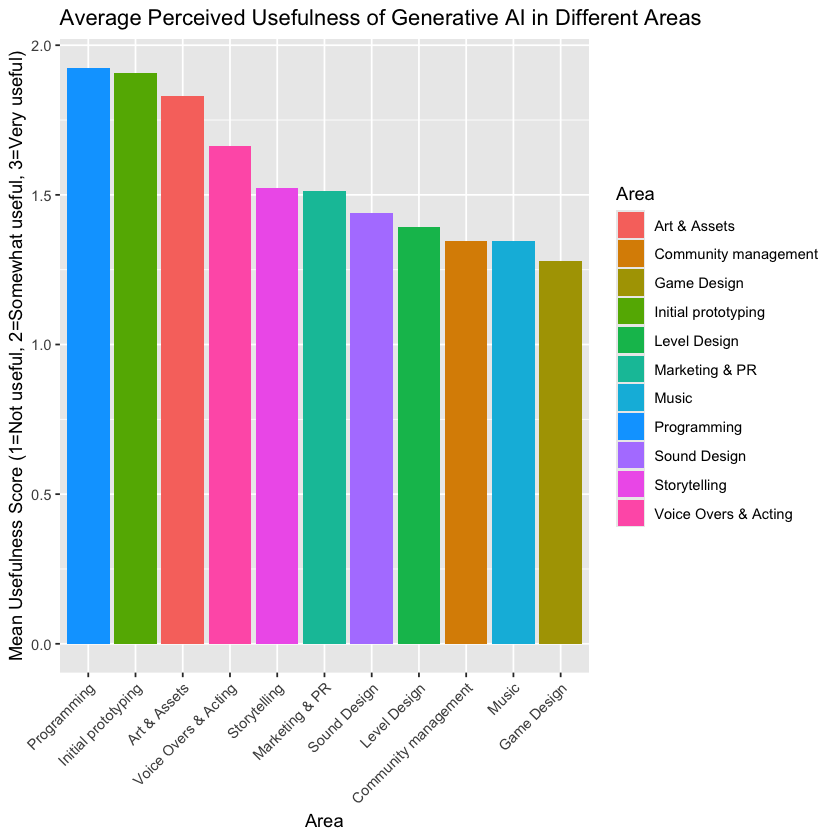

In [292]:
# Bar plot of average usefulness scores with y-axis fixed
ggplot(
  mean_usefulness_scores,
  aes(x = reorder(Area, -MeanScore), y = MeanScore, fill = Area)
) +
  geom_bar(stat = "identity") +
  labs(
    title = "Average Perceived Usefulness of Generative AI in Different Areas",
    x = "Area",
    y = "Mean Usefulness Score (1=Not useful, 2=Somewhat useful, 3=Very useful)"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Perceived Usefulness of Generative AI in Different Areas by Lead Role

`summarise()` has grouped output by 'Area'. You can override using the
`.groups` argument.


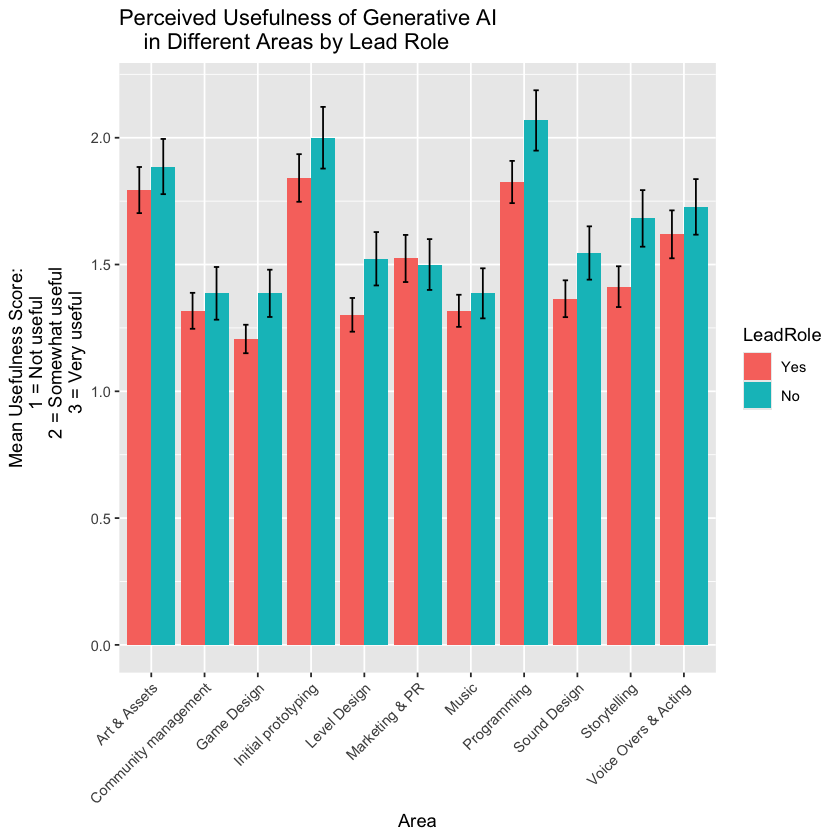

In [293]:
# Ensure the lead role column is correctly labeled
data <- data %>%
  mutate(LeadRole = factor(
    data[[8]],
    levels = c("Yes", "No")
  ))

# Remove rows with all NA values in usefulness columns
data <- data %>%
  filter(rowSums(!is.na(select(., all_of(usefulness_columns)))) > 0)

# Pivot the data to a long format for ggplot2
usefulness_long <- data %>%
  pivot_longer(
    cols = all_of(usefulness_columns),
    names_to = "Area",
    values_to = "UsefulnessScore"
  )

# Remove rows with NA values in UsefulnessScore or LeadRole
usefulness_long <- usefulness_long %>%
  filter(
    !is.na(UsefulnessScore),
    !is.na(LeadRole)
  )

# Calculate mean and standard error for each group
usefulness_summary <- usefulness_long %>%
  group_by(Area, LeadRole) %>%
  summarise(
    MeanScore = mean(UsefulnessScore, na.rm = TRUE),
    SE = sd(UsefulnessScore, na.rm = TRUE) / sqrt(n())
  )

# Bar plot with error bars side by side
ggplot(usefulness_summary, aes(
  x = Area,
  y = MeanScore,
  fill = LeadRole
)) +
  geom_bar(
    stat = "identity",
    position = position_dodge(width = 0.9)
  ) +
  geom_errorbar(
    aes(
      ymin = MeanScore - SE,
      ymax = MeanScore + SE
    ),
    width = 0.2,
    position = position_dodge(width = 0.9)
  ) +
  labs(
    title = "Perceived Usefulness of Generative AI
    in Different Areas by Lead Role",
    x = "Area",
    y = "Mean Usefulness Score:
      1 = Not useful
      2 = Somewhat useful
      3 = Very useful"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


#### Perceived Usefulness of Generative AI in Different Areas by Professional or hobbyist 

Area,Role,MeanScore,SE
<chr>,<fct>,<dbl>,<dbl>
Art & Assets,Professional,1.831776,0.06961868
Art & Assets,Hobbyist,1.945000,0.05314127
Community management,Professional,1.345794,0.05953858
Community management,Hobbyist,1.270000,0.03928379
Game Design,Professional,1.280374,0.05107622
Game Design,Hobbyist,1.305000,0.03959436
Initial prototyping,Professional,1.906542,0.07456771
Initial prototyping,Hobbyist,1.930000,0.05559636
Level Design,Professional,1.392523,0.05902429


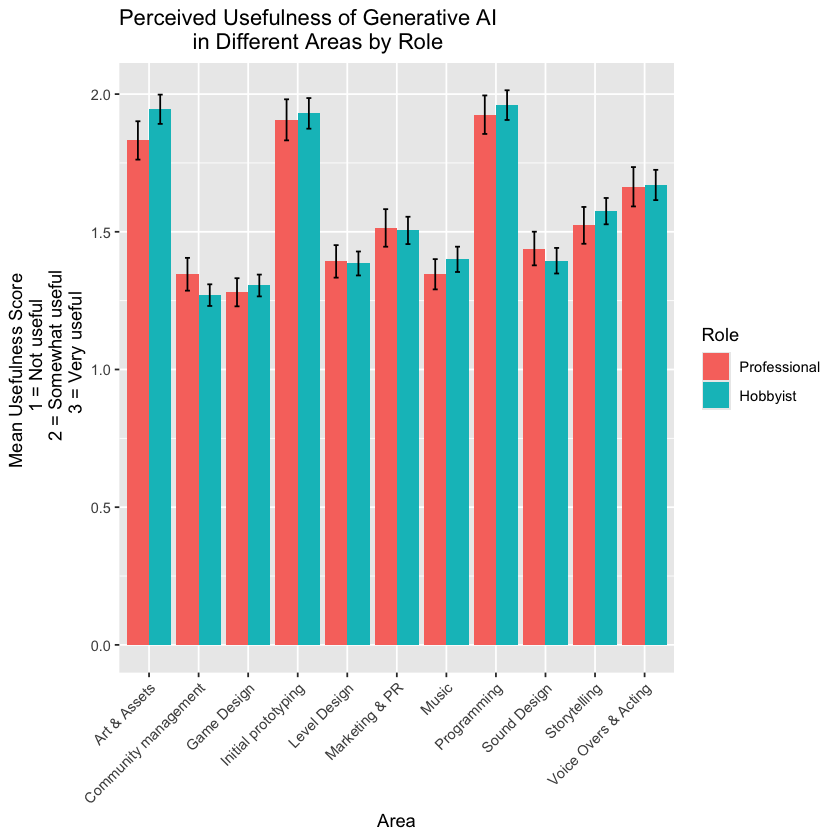

In [294]:
# Reset to source data
data <- read_excel(file_path)

data <- data %>%
  mutate(across(
    all_of(usefulness_columns),
    ~ usefulness_mapping[as.character(.)]
  ))

# Ensure the role column is correctly labeled
data <- data %>%
  mutate(Role = factor(
    data[[5]],
    levels = c("Professional", "Hobbyist")
  ))

# Remove rows with all NA values in usefulness columns
data <- data %>%
  filter(rowSums(!is.na(select(., all_of(usefulness_columns)))) > 0)

# Pivot the data to a long format for ggplot2
usefulness_long <- data %>%
  pivot_longer(
    cols = all_of(usefulness_columns),
    names_to = "Area",
    values_to = "UsefulnessScore"
  )

# Remove rows with NA values in UsefulnessScore or Role
usefulness_long <- usefulness_long %>%
  filter(!is.na(UsefulnessScore), !is.na(Role))

# Calculate mean and standard error for each group
usefulness_summary <- usefulness_long %>%
  group_by(Area, Role) %>%
  summarise(
    MeanScore = mean(UsefulnessScore, na.rm = TRUE),
    SE = sd(UsefulnessScore, na.rm = TRUE) / sqrt(n()),
    .groups = "drop" # Explicitly drop the grouping
  )

# Bar plot with error bars side by side
ggplot(usefulness_summary, aes(
  x = Area,
  y = MeanScore,
  fill = Role
)) +
  geom_bar(
    stat = "identity",
    position = position_dodge(width = 0.9)
  ) +
  geom_errorbar(
    aes(
      ymin = MeanScore - SE,
      ymax = MeanScore + SE
    ),
    width = 0.2,
    position = position_dodge(width = 0.9)
  ) +
  labs(
    title = "Perceived Usefulness of Generative AI
            in Different Areas by Role",
    x = "Area",
    y = "Mean Usefulness Score 
      1 = Not useful 
      2 = Somewhat useful 
      3 = Very useful"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print summary
usefulness_summary


#### Perceived Usefulness of Generative AI in Different Areas by Usage

Area,UsesGenAI,MeanScore,SE
<chr>,<fct>,<dbl>,<dbl>
Art & Assets,Yes,2.313559,0.06334529
Art & Assets,No,1.650794,0.04773149
Community management,Yes,1.398305,0.06034791
Community management,No,1.232804,0.03742102
Game Design,Yes,1.576271,0.06184987
Game Design,No,1.121693,0.02609801
Initial prototyping,Yes,2.296610,0.06734694
Initial prototyping,No,1.687831,0.05213607
Level Design,Yes,1.627119,0.06345663


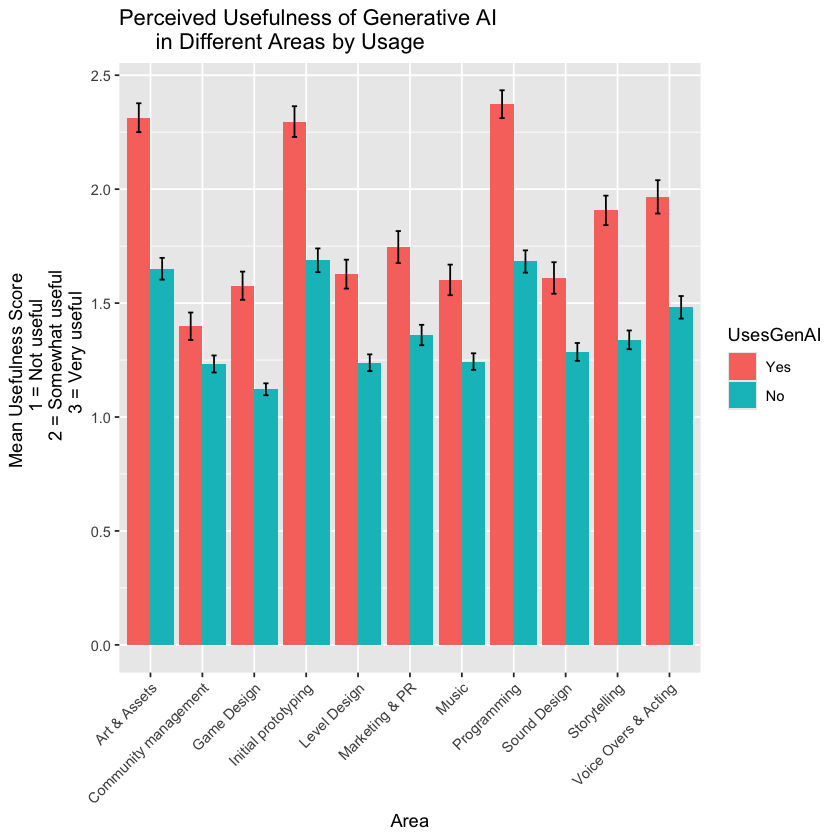

In [295]:
# Reset to source data
data <- read_excel(file_path)

data <- data %>%
  mutate(across(
    all_of(usefulness_columns),
    ~ usefulness_mapping[as.character(.)]
  ))

# Ensure the usage of Generative AI column is correctly labeled
data <- data %>%
  mutate(UsesGenAI = factor(
    data[[23]],
    levels = c("Yes", "No")
  ))

# Remove rows with all NA values in usefulness columns
data <- data %>%
  filter(rowSums(!is.na(select(., all_of(usefulness_columns)))) > 0)

# Pivot the data to a long format for ggplot2
usefulness_long <- data %>%
  pivot_longer(
    cols = all_of(usefulness_columns),
    names_to = "Area",
    values_to = "UsefulnessScore"
  )

# Remove rows with NA values in UsefulnessScore or UsesGenAI
usefulness_long <- usefulness_long %>%
  filter(!is.na(UsefulnessScore), !is.na(UsesGenAI))

# Calculate mean and standard error for each group
usefulness_summary <- usefulness_long %>%
  group_by(Area, UsesGenAI) %>%
  summarise(
    MeanScore = mean(UsefulnessScore, na.rm = TRUE),
    SE = sd(UsefulnessScore, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

# Bar plot with error bars side by side
ggplot(usefulness_summary, aes(
  x = Area,
  y = MeanScore,
  fill = UsesGenAI
)) +
  geom_bar(
    stat = "identity",
    position = position_dodge(width = 0.9)
  ) +
  geom_errorbar(
    aes(
      ymin = MeanScore - SE,
      ymax = MeanScore + SE
    ),
    width = 0.2,
    position = position_dodge(width = 0.9)
  ) +
  labs(
    title = "Perceived Usefulness of Generative AI 
      in Different Areas by Usage",
    x = "Area",
    y = "Mean Usefulness Score 
      1 = Not useful 
      2 = Somewhat useful 
      3 = Very useful"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Calculate mean and standard error for each group
usefulness_summary <- usefulness_long %>%
  group_by(Area, UsesGenAI) %>%
  summarise(
    MeanScore = mean(UsefulnessScore, na.rm = TRUE),
    SE = sd(UsefulnessScore, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

# Print the summarized data
usefulness_summary


#### Perceived Usefulness of Generative AI in Different Areas by Internal Stigma Perception

Area,StigmaGenAI,MeanScore,SE
<chr>,<fct>,<dbl>,<dbl>
Art & Assets,Yes,1.659420,0.06213554
Art & Assets,No,2.106509,0.05310944
Community management,Yes,1.224638,0.04365861
Community management,No,1.355030,0.04773624
Game Design,Yes,1.217391,0.04080426
Game Design,No,1.360947,0.04557878
Initial prototyping,Yes,1.724638,0.06404018
Initial prototyping,No,2.082840,0.05900229
Level Design,Yes,1.282609,0.04712077


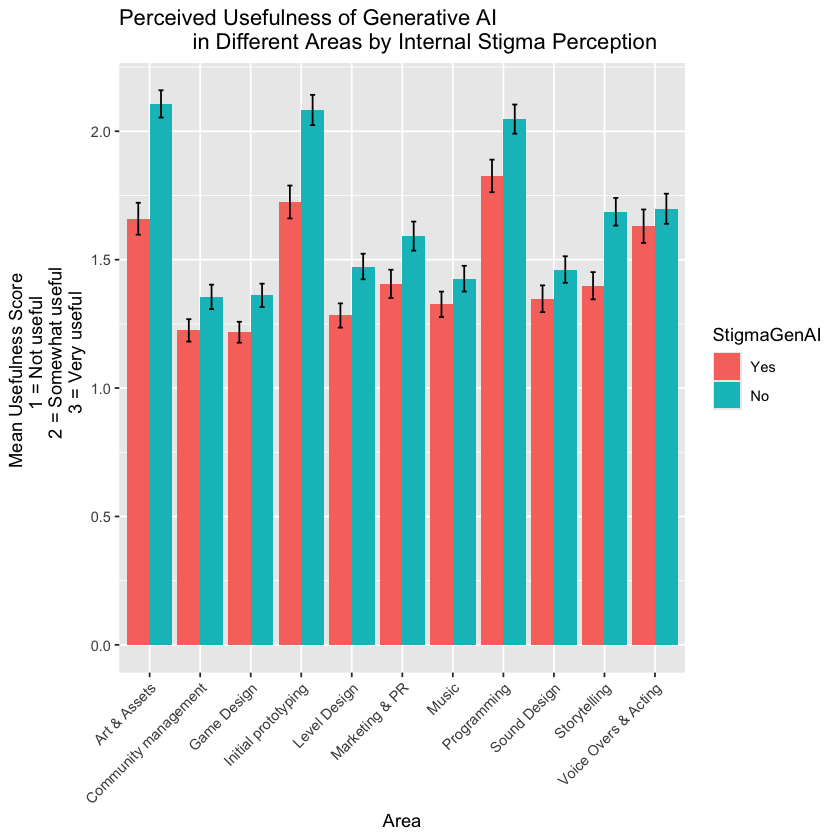

In [296]:
# Reset to source data
data <- read_excel(file_path)

data <- data %>%
  mutate(across(
    all_of(usefulness_columns),
    ~ usefulness_mapping[as.character(.)]
  ))

# Ensure the stigma column is correctly labeled
data <- data %>%
  mutate(StigmaGenAI = factor(
    data[[33]],
    levels = c("Yes", "No")
  ))

# Remove rows with all NA values in usefulness columns
data <- data %>%
  filter(rowSums(!is.na(select(., all_of(usefulness_columns)))) > 0)

# Pivot the data to a long format for ggplot2
usefulness_long <- data %>%
  pivot_longer(
    cols = all_of(usefulness_columns),
    names_to = "Area",
    values_to = "UsefulnessScore"
  )

# Remove rows with NA values in UsefulnessScore or StigmaGenAI
usefulness_long <- usefulness_long %>%
  filter(!is.na(UsefulnessScore), !is.na(StigmaGenAI))

# Calculate mean and standard error for each group
usefulness_summary <- usefulness_long %>%
  group_by(Area, StigmaGenAI) %>%
  summarise(
    MeanScore = mean(UsefulnessScore, na.rm = TRUE),
    SE = sd(UsefulnessScore, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

# Bar plot with error bars side by side
ggplot(usefulness_summary, aes(
  x = Area,
  y = MeanScore,
  fill = StigmaGenAI
)) +
  geom_bar(
    stat = "identity",
    position = position_dodge(width = 0.9)
  ) +
  geom_errorbar(
    aes(
      ymin = MeanScore - SE,
      ymax = MeanScore + SE
    ),
    width = 0.2,
    position = position_dodge(width = 0.9)
  ) +
  labs(
    title = "Perceived Usefulness of Generative AI 
            in Different Areas by Internal Stigma Perception",
    x = "Area",
    y = "Mean Usefulness Score 
      1 = Not useful
      2 = Somewhat useful
      3 = Very useful"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print the usefulness summary to get results in text form
usefulness_summary


#### Perceived Usefulness of Generative AI in Different Areas by External Stigma Perception

Area,ExternalStigmaGenAI,MeanScore,SE
<chr>,<fct>,<dbl>,<dbl>
Art & Assets,Yes,1.886555,0.04762504
Art & Assets,No,1.971014,0.09226480
Community management,Yes,1.256303,0.03506786
Community management,No,1.434783,0.08122638
Game Design,Yes,1.239496,0.03243718
Game Design,No,1.492754,0.07895089
Initial prototyping,Yes,1.869748,0.04963473
Initial prototyping,No,2.101449,0.09715678
Level Design,Yes,1.352941,0.03679173


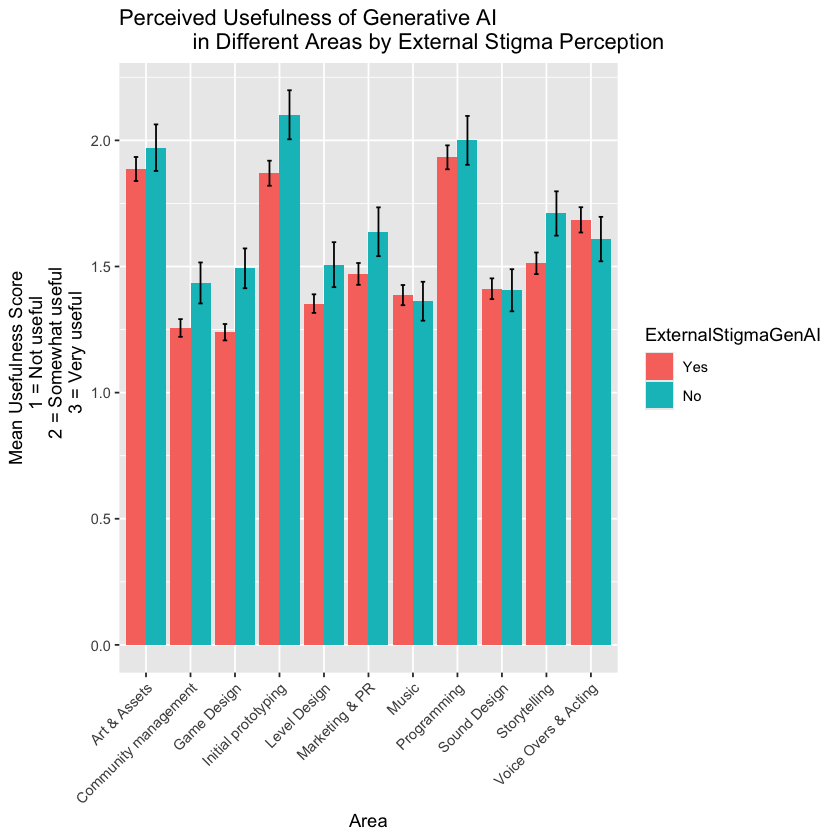

In [297]:
# Reset to source data
data <- read_excel(file_path)

data <- data %>%
  mutate(across(
    all_of(usefulness_columns),
    ~ usefulness_mapping[as.character(.)]
  ))

# Ensure the external stigma column is correctly labeled
data <- data %>%
  mutate(ExternalStigmaGenAI = factor(
    data[[34]],
    levels = c("Yes", "No")
  ))

# Remove rows with all NA values in usefulness columns
data <- data %>%
  filter(rowSums(!is.na(select(., all_of(usefulness_columns)))) > 0)

# Pivot the data to a long format for ggplot2
usefulness_long <- data %>%
  pivot_longer(
    cols = all_of(usefulness_columns),
    names_to = "Area",
    values_to = "UsefulnessScore"
  )

# Remove rows with NA values in UsefulnessScore or ExternalStigmaGenAI
usefulness_long <- usefulness_long %>%
  filter(!is.na(UsefulnessScore), !is.na(ExternalStigmaGenAI))

# Calculate mean and standard error for each group
usefulness_summary <- usefulness_long %>%
  group_by(Area, ExternalStigmaGenAI) %>%
  summarise(
    MeanScore = mean(UsefulnessScore, na.rm = TRUE),
    SE = sd(UsefulnessScore, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

# Bar plot with error bars side by side
ggplot(
  usefulness_summary,
  aes(
    x = Area,
    y = MeanScore,
    fill = ExternalStigmaGenAI
  )
) +
  geom_bar(
    stat = "identity",
    position = position_dodge(width = 0.9)
  ) +
  geom_errorbar(
    aes(
      ymin = MeanScore - SE,
      ymax = MeanScore + SE
    ),
    width = 0.2,
    position = position_dodge(width = 0.9)
  ) +
  labs(
    title = "Perceived Usefulness of Generative AI
            in Different Areas by External Stigma Perception",
    x = "Area",
    y = "Mean Usefulness Score
      1 = Not useful
      2 = Somewhat useful
      3 = Very useful"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print the usefulness summary to get results in text form
usefulness_summary


## Some questions about how your use of Generative AI impact different areas of your work?

#### Impact of Generative AI on Different Areas of Work

# A tibble: 4 x 2
  ImpactArea  MeanScore
  <chr>           <dbl>
1 Efficiency?      3.97
2 Quality?         3.08
3 Enjoyment?       3.46
4 Creativity?      3.33


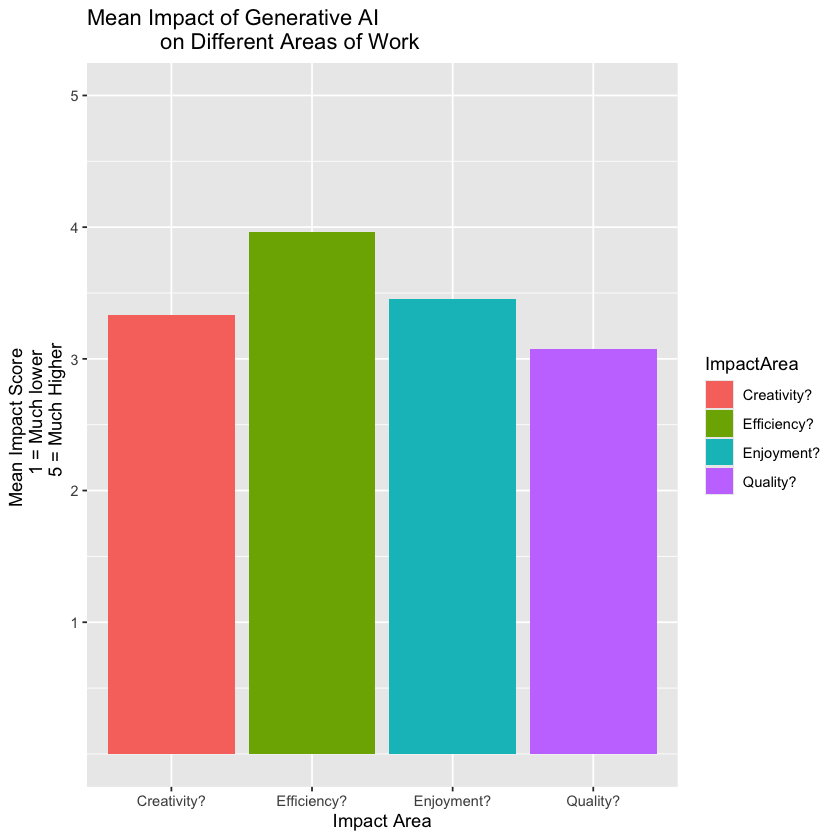

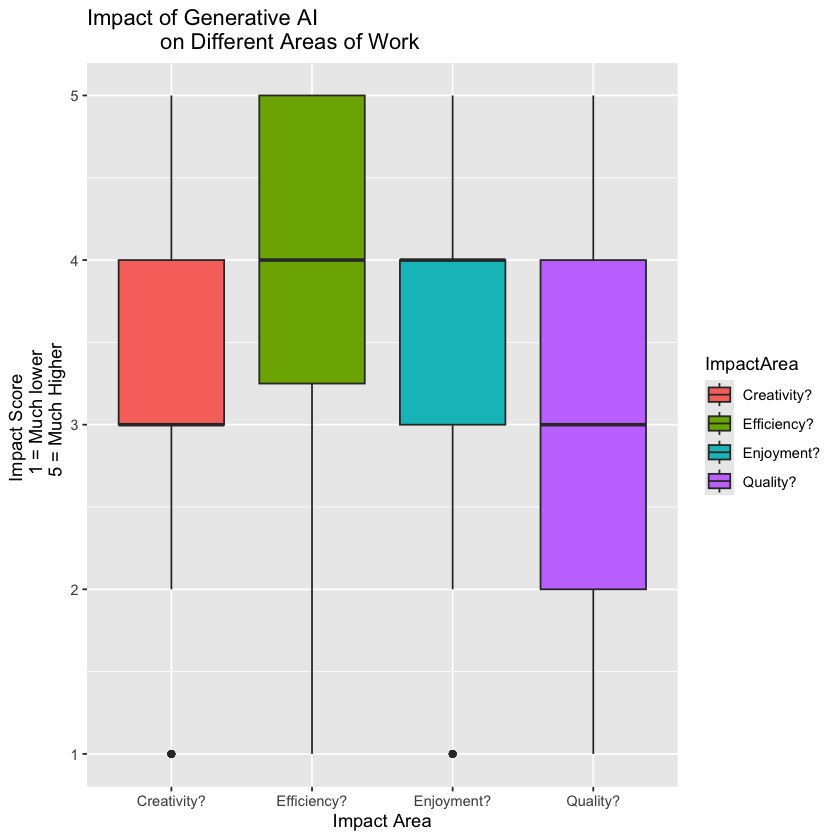

In [298]:
# Reset to source data
data <- read_excel(file_path)

# Define impact columns
impact_columns <- c("Efficiency?", "Quality?", "Enjoyment?", "Creativity?")

# Convert impact columns to factors with specific levels
data <- data %>%
  mutate(across(all_of(impact_columns), ~ factor(., levels = c(
    "Much lower", "Lower", "Neutral", "Higher", "Much Higher"
  ))))

# Map categorical responses to numeric values
impact_mapping <- c(
  "Much lower" = 1,
  "Lower" = 2,
  "Neutral" = 3,
  "Higher" = 4,
  "Much Higher" = 5
)

data <- data %>%
  mutate(across(all_of(impact_columns), ~ impact_mapping[as.character(.)]))

# Calculate mean impact scores for each area
mean_impact_scores <- data %>%
  summarise(across(all_of(impact_columns), ~ mean(.x, na.rm = TRUE))) %>%
  pivot_longer(
    cols = everything(),
    names_to = "ImpactArea",
    values_to = "MeanScore"
  )

# Print mean impact scores to check for anomalies
print(mean_impact_scores)

# Bar plot of the mean impact scores
ggplot(
  mean_impact_scores,
  aes(x = ImpactArea, y = MeanScore, fill = ImpactArea)
) +
  geom_bar(stat = "identity") +
  labs(
    title = "Mean Impact of Generative AI 
            on Different Areas of Work",
    x = "Impact Area",
    y = "Mean Impact Score 
      1 = Much lower 
      5 = Much Higher"
  ) +
  scale_y_continuous(limits = c(0, 5), breaks = 1:5)

# Here's the boxplot

# Pivot the data to a long format for ggplot2
impact_long <- data %>%
  pivot_longer(
    cols = all_of(impact_columns),
    names_to = "ImpactArea",
    values_to = "ImpactScore"
  )

# Remove rows with NA values in ImpactScore
impact_long <- impact_long %>%
  filter(!is.na(ImpactScore))

# Box plot of the impact of Generative AI on different areas
ggplot(impact_long, aes(x = ImpactArea, y = ImpactScore, fill = ImpactArea)) +
  geom_boxplot() +
  labs(
    title = "Impact of Generative AI 
            on Different Areas of Work",
    x = "Impact Area",
    y = "Impact Score 
      1 = Much lower 
      5 = Much Higher"
  ) +
  scale_y_continuous(limits = c(1, 5), breaks = 1:5)

#### Impact of Generative AI on Different Areas by Lead Role

# A tibble: 8 x 4
  ImpactArea  LeadRole MeanScore    SE
  <chr>       <chr>        <dbl> <dbl>
1 Creativity? No            3.39 0.244
2 Creativity? Yes           3.04 0.236
3 Efficiency? No            4.06 0.262
4 Efficiency? Yes           3.96 0.189
5 Enjoyment?  No            3    0.313
6 Enjoyment?  Yes           3.26 0.211
7 Quality?    No            3.17 0.305
8 Quality?    Yes           2.74 0.189


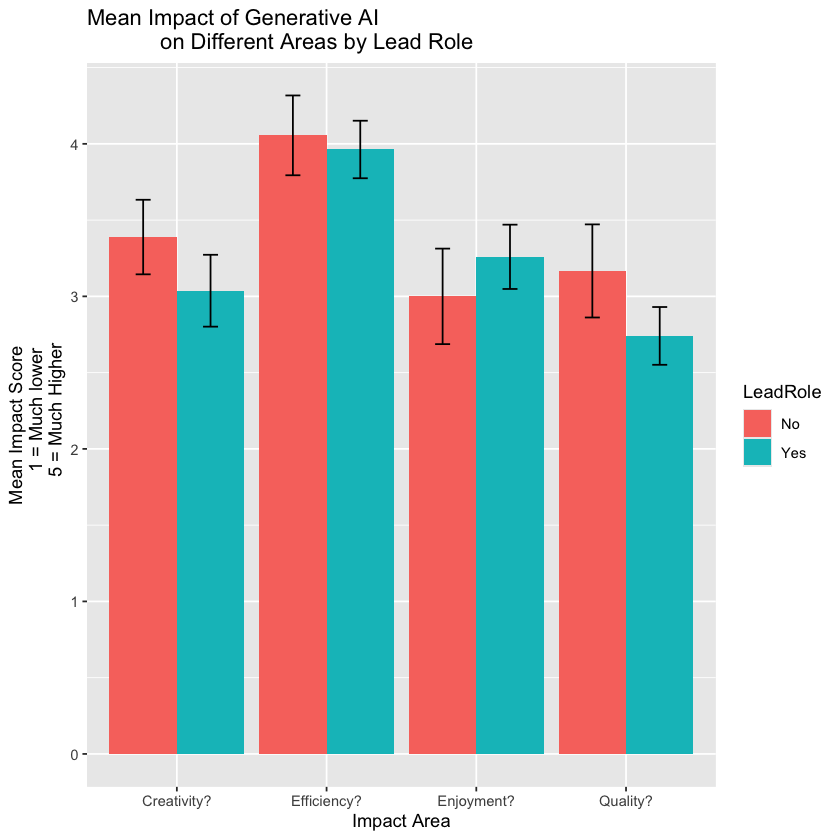

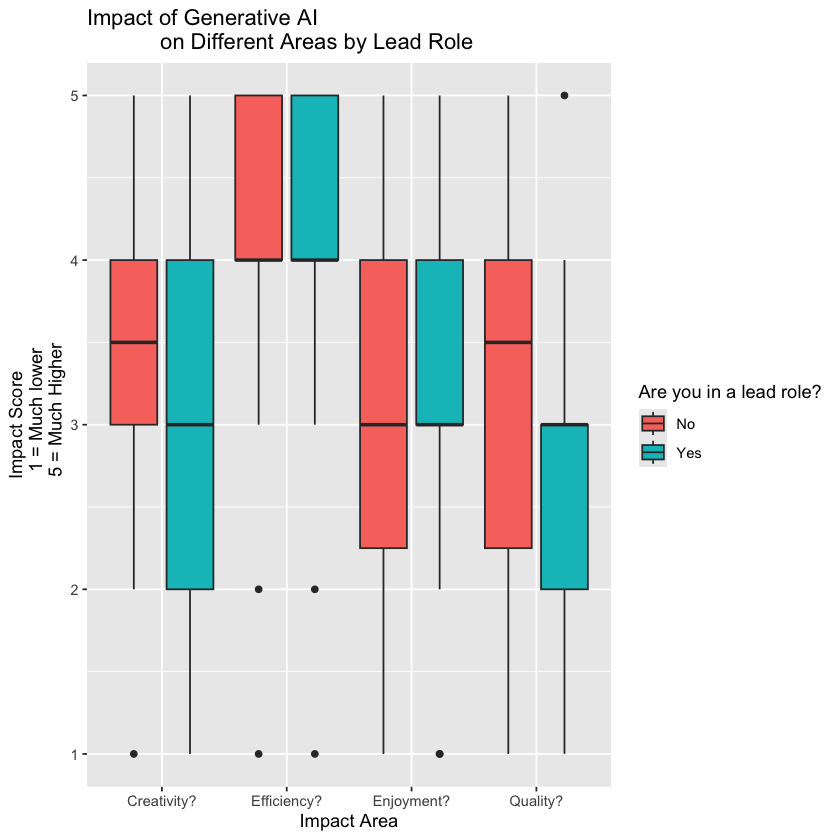

In [299]:
# Reset to source data
data <- read_excel(file_path)

data <- data %>%
  mutate(across(
    all_of(impact_columns),
    ~ impact_mapping[as.character(.)]
  ))

# Pivot the data to a long format for ggplot2
impact_long <- data %>%
  pivot_longer(
    cols = all_of(impact_columns),
    names_to = "ImpactArea",
    values_to = "ImpactScore"
  )

# Remove rows with NA values in ImpactScore or LeadRole
impact_long <- impact_long %>%
  filter(!is.na(ImpactScore), !is.na(`Are you in a lead role?`))

# Calculate mean impact scores for each area and role
mean_impact_scores_by_role <- impact_long %>%
  group_by(ImpactArea, `Are you in a lead role?`) %>%
  summarise(
    MeanScore = mean(ImpactScore, na.rm = TRUE),
    SE = sd(ImpactScore, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

# Rename the role column for better readability
colnames(mean_impact_scores_by_role)[2] <- "LeadRole"

# Print mean impact scores by role to check for anomalies
print(mean_impact_scores_by_role)

# Bar plot with error bars side by side
barplot <- ggplot(
  mean_impact_scores_by_role,
  aes(
    x = ImpactArea,
    y = MeanScore,
    fill = LeadRole
  )
) +
  geom_bar(
    stat = "identity",
    position = position_dodge(width = 0.9)
  ) +
  geom_errorbar(
    aes(
      ymin = MeanScore - SE,
      ymax = MeanScore + SE
    ),
    width = 0.2,
    position = position_dodge(width = 0.9)
  ) +
  labs(
    title = "Mean Impact of Generative AI
            on Different Areas by Lead Role",
    x = "Impact Area",
    y = "Mean Impact Score
      1 = Much lower
      5 = Much Higher"
  )

# Box plot of the impact of Generative AI on different areas by lead role
boxplot <- ggplot(
  impact_long,
  aes(
    x = ImpactArea,
    y = ImpactScore,
    fill = `Are you in a lead role?`
  )
) +
  geom_boxplot(
    position = position_dodge(width = 0.9)
  ) +
  labs(
    title = "Impact of Generative AI
            on Different Areas by Lead Role",
    x = "Impact Area",
    y = "Impact Score
      1 = Much lower
      5 = Much Higher"
  )

# Print the plots
print(barplot)
print(boxplot)
